# Set up and Config

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import anndata as ad
import PyPDF2
import matplotlib.pyplot as plt
import statistics as st
from pathlib import Path
import scipy.stats as stats
from collections import defaultdict
from statannot import add_stat_annotation

In [2]:
#Adata Files
adata_processed = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_processed__02172022.h5ad"
adata = sc.read_h5ad(adata_processed)

adata_tissue = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_kidney_processed_03072022.h5ad"
tissue = sc.read_h5ad(adata_tissue)

sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


In [ ]:
sc.pl.pca_overview(tissue)

# Clustering

Thymus

In [ ]:
#adata_kidney = adata[adata.obs['tissue'] == "Kidney"].copy()
#sc.pp.pca(adata_kidney)
#sc.pp.neighbors(adata_kidney, n_pcs=9)
#sc.tl.leiden(adata_kidney) 
#sc.tl.umap(adata_kidney)

In [ ]:
#adata_kidney_processed = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_kidney_processed_03072022.h5ad"
#adata_kidney.write(adata_kidney_processed)


# Clustering consistancy

In [ ]:
sc.pl.umap(tissue, color = ['leiden', 'cell_ontology_class'], wspace= 0.5)

## Kidney

### mt genes

In [ ]:
sc.pl.umap(tissue, color = ['mt-Atp6','mt-Atp8','mt-Co1','mt-Co2','mt-Co3','mt-Cytb','mt-Nd1','mt-Nd2','mt-Nd3','mt-Nd4','mt-Nd4l','mt-Nd5','mt-Nd6','mt-Rnr1','mt-Rnr2','mt-Ta','mt-Te','mt-Tf','mt-Ti','mt-Tl1','mt-Tl2','mt-Tm','mt-Tp','mt-Tq','mt-Tt','mt-Tv'], wspace= 0.5, color_map='Oranges', ncols=3)


* "Mechanistically, through an autocrine effect, macrophage-derived TSP1 suppressed Smpdl3b expression in liver, which amplified liver proinflammatory signalling (Toll-like receptor 4 signal pathway) and promoted NAFLD progression." https://pubmed.ncbi.nlm.nih.gov/33294831/

* "Binding of mycobacterial trehalose 6,6'- dimycolate (TDM) to [Fcer1g] receptor complex leads to phosphorylation of ITAM, triggering activation of SYK, CARD9 and NF-kappa-B, consequently driving maturation of antigen-presenting cells and shaping antigen-specific priming of T-cells toward effector T-helper 1 and T-helper 17 cell subtypes." https://www.proteinatlas.org/ENSG00000158869-FCER1G 

In [ ]:
sc.pl.umap(tissue, color = ['Cd36', 'Cd38','Smpdl3b','Thbs1','Tlr4','Nfkb1','Syk','Card9'], wspace= 0.5, color_map='Oranges', ncols=3)

In [ ]:
sc.pl.umap(tissue, color = ['leiden', 'age'], wspace=.5)

In [ ]:
sc.pl.umap(tissue, color = ['leiden', 'cell_ontology_class'], wspace= 0.5)

In [ ]:
sc.pl.umap(tissue, color = ['leiden', 'mouse.id'], wspace= 0.4)

In [ ]:
sc.pl.umap(tissue, color = ['Cd19', 'Cd27','Cd38', 'Cd40lg', 'Il2', 'Il10'], wspace= 0.4, color_map='Oranges', ncols = 3)
#B cell marker, Cd19+, Cd27-, Cd38+
#Ig Secreting Cells (ISC) can be generated in vitro by culturing human B cells w/T cell-derived stimuli CD40L, IL-2, and IL-10

### Macrophage inflammatory protein production

In [ ]:
#as noted on geneontology.org 
sc.pl.umap(tissue, color = ['Mefv', 'Arg2','Mcoln2','Trem2','Nod2','Sirpa','Trpv4'], wspace= 0.5, color_map= 'Oranges', ncols= 3)


### B cell receptor complex

In [ ]:
#as noted on geneontology.org
sc.pl.umap(tissue, color = ['Ighm','Iglc1','Syk','Ighd','Lime1', 'Cd79a','Cd79b'], wspace= 0.5, color_map= 'Oranges', ncols= 3)
#sc.pl.umap(tissue, color = ['Ighm','Ighd','Cd79a','Cd79b'], wspace= 0.5, color_map= 'Oranges', ncols= 4)


### Macrophage regulation

According to Human Protein Atlas
* Ulbp1: All immune cells, higest in macrophages
* Grn: Many immune cells, most highly in Hofbauer, Kupffer and macrophage cells
* Cx3cl1: low in immune cells
* Fer1l5: low in immune cells
* Cd200: Enriched in B cells, monocytes. most immune cells
* Syt11: all immune cells
* Bpi: Among immune cells, highest in monocytes
* Pla2g10: barely detected in immune cells

In [ ]:
#as noted on geneontology.org
sc.pl.umap(tissue, color = ['Ulbp1','Cx3cl1','Fer1l5','Grn','Cd200','Shpk', 'Syt11','Bpi','Pla2g10'], wspace= 0.5, color_map= 'Oranges', ncols= 3)


### B cell differentiation

* Cd24a: results in acquisition of features of immature B cell
* Bcl6: results in acquisition of features of B cell

In [ ]:
#as noted on geneontology.org
sc.pl.umap(tissue, color = ['Rag1', 'Rag2','Cd24a','Bcl6','Atm','Foxp1','Dock10','Dpp4','Bax','Prdm1','Traf3ip2','Adgrg3','Atp11c', 'Bak1','Plcl2'], wspace= 0.5, color_map= 'Oranges', ncols= 3)


### Interferon genes

In [ ]:
sc.pl.umap(tissue, color = ['Ifnlr1','Ifnl3','Ifnar1','Ifnar2','Klhl20','Nfkb1'], wspace= 0.5, color_map= 'Oranges', ncols= 3)
#Ifnl3 is interferon lambda
#Ifnlr1 is interferon lambda receptor 
#Ifnar1 IFN-a and -b receptor
#Ifnar2 IFN-a and -b receptor
#Klhl20 IFN gamma binding
#Nfkb1 is Nf-kb

### Macropahge proliferation genes

In [ ]:
sc.pl.umap(tissue, color = ['Cx3cl1','Ptk2','Gba','Csf1r','Csf1','Il34','Mapk3','Mapk1'], wspace= 0.5, color_map= 'Oranges', ncols= 3)

### 'Iglc3','Iglc2','Igkc'

Highly expressed in B cells and Plasma cells, less so in T cells, not macrophages

In [ ]:
sc.pl.umap(tissue, color = ['Iglc3','Iglc2','Igkc'], wspace= 0.5, color_map= 'Oranges', ncols= 3)


### 'Cd79a','Cd79b','Cd37'

"CD37 is a tetraspanin expressed prominently on the surface of B cells" (https://pubmed.ncbi.nlm.nih.gov/33333768/)

In [ ]:
sc.pl.umap(tissue, color = ['Cd79a','Cd79b','Cd37'], wspace= 0.5, color_map= 'Oranges')

### Macrophage M1/M2 polarization, Yunna et al. 2020

In [ ]:
#M1
sc.pl.umap(tissue, color = ['Il6','Il12a','Il12b',
                            'Tnf','Cd80','Cd86',
                            'Fcgr3','Fcgr4','Fcgr2b'], wspace= 0.5, color_map= 'Oranges',ncols = 3)
#M1 overexpress: Cd80, Cd86, Cd16/32
#Fcgr3 is Cd16. Fcgr4 similar?
#Fcgr2b is Cd32

#M1 produce Il-12, Il-6, Tnf

In [ ]:
#M2, leiden 10?
sc.pl.umap(tissue, color = ['Arg1','Mrc1','Il10',
                            'Ccl17','Ccl22', 'Pparg',
                           'Ppargc1a'], wspace= 0.5, color_map= 'Oranges',ncols = 3)

#M2 overexpress: 'Arg1','Mrc1','Il10','Ccl17','Ccl22'
#Mrc1 is Cd206, mannose receptor
#Pparg, nuclear transcpxn factor promotes M2, inhibits M1
#Ppargc1a, This protein interacts with PPARgamma, It provides a direct link between external physiological stimuli and the regulation of mitochondrial biogenesis, and is a major factor that regulates muscle fiber type determination.

### Jablonski M1 & M2 marker genes

In [ ]:
sc.pl.umap(tissue, color = ['Cd38','Myc','Fpr2','Egr2','Gpr18',
                   'Nos2','Il1b','Il6','Il12b','Ccr7',
                   'Inhba','Tnf','Arg1','Retnla','Fn1',
                   'Mrc1'], wspace= 0.5, color_map= 'Oranges',ncols = 3)

In [ ]:
M1_short = ['Junb','Cebpd','Cav1','Herpud1','Tgm2','Egr1','Il2rg','Dck','Ifitm3','Srgn','Sqstm1','Atf4','Tapbp','Hspa5']

M2_short = ['Egr2','Tns1','Ypel3','Pdcd4','Dnmt1','Gmnn','Rapgef6','Mxi1','H2afv','Nfic','Tsc22d3','AU020206','Dag1','Parp1','Paip2','Erp29','Sash3','Ptpn22','Siva1','Rmnd5a','Selplg','Cdk2ap2','Timp2','Map1lc3b','Ppp2r5c','Cd151','Dusp3','Vamp4','Crip1','Gltp','Ctnnb1','B4galnt1']


In [ ]:
#M1 short
sc.pl.umap(tissue, color = ['Junb','Cebpd','Cav1','Herpud1','Tgm2',
                            'Egr1','Il2rg','Dck','Ifitm3','Srgn','Sqstm1',
                            'Atf4','Tapbp','Hspa5'], wspace= 0.5, color_map= 'Oranges',ncols = 3)

In [ ]:
#M2 short

sc.pl.umap(tissue, color = ['Egr2','Tns1','Ypel3',
                            'Pdcd4','Dnmt1','Gmnn',
                            'Rapgef6','Mxi1','H2afv',
                            'Nfic','Tsc22d3','AU020206',
                            'Dag1','Parp1','Paip2',
                            'Erp29','Sash3','Ptpn22',
                            'Siva1','Rmnd5a','Selplg',
                            'Cdk2ap2','Timp2','Map1lc3b',
                            'Ppp2r5c','Cd151','Dusp3',
                            'Vamp4','Crip1','Gltp',
                            'Ctnnb1','B4galnt1'], wspace= 0.5, color_map= 'Oranges',ncols = 3)

# Lists

In [5]:
mitocarta3_path = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/Mouse_mt_genes.csv"
mitocarta3_df = pd.read_csv(mitocarta3_path)
mt_nc_genes = list(mitocarta3_df['Symbol'])

mitocarta_remove = ["mt-Atp6",
                    "mt-Atp8",
                    "mt-Co1",
                    "mt-Co2",
                    "mt-Co3",
                    "mt-Cytb",
                    "mt-Nd1",
                    "mt-Nd2",
                    "mt-Nd3",
                    "mt-Nd4",
                    "mt-Nd4l",
                    "mt-Nd5",
                    "mt-Nd6"]

#removing mt_encoded genes
for m in mitocarta_remove:
    mt_nc_genes.remove(m)

In [6]:
mt_genes = [
    "mt-Atp6",
    "mt-Atp8",
    "mt-Co1",
    "mt-Co2",
    "mt-Co3",
    "mt-Cytb",
    "mt-Nd1",
    "mt-Nd2",
    "mt-Nd3",
    "mt-Nd4",
    "mt-Nd4l",
    "mt-Nd5",
    "mt-Nd6",
    "mt-Rnr1",
    "mt-Rnr2",
    "mt-Ta",
    "mt-Te",
    "mt-Tf",
    "mt-Ti",
    "mt-Tl1",
     "mt-Tl2",
    "mt-Tm",
    "mt-Tp",
    "mt-Tq",
    "mt-Tt",
    "mt-Tv"
]

Genes not in adata.vars

In [7]:
#sc.tl.score_genes_cell_cycle ignored these genes since they're not in .vars
ignored = ['Gatd3a', 'Micos10', 'Fdx2', 'Mmut', 'Atp5pb', 'Mtarc2', 'Micos13', 'Mtres1', 'Coa8', 'Tmlhe', 'Mtarc1', 'Prxl2a', 'Marchf5', 'Dmac2l', 'Atp5md', 'Antkmt', 'Atpsckmt', 'Septin4', 'Prorp', 'Htd2', 'Pigbos1']


Mitocarta3.0 nuclear genes combined with mitochondrial genes

In [8]:
mt_nc = mt_genes + mt_nc_genes

In [9]:
tis_cells = list(set(tissue.obs['cell_ontology_class']))
ages = ['3m','18m','24m']

In [10]:
bcr = ['Ighm','Iglc1','Syk','Ighd','Lime1', 'Cd79a','Cd79b']

# leiden plots

## Kidney

In [ ]:
sc.tl.dendrogram(tissue, groupby = 'leiden')
sc.pl.dendrogram(tissue, groupby = 'leiden')

### leiden 14 cluster

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['14'], method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=2)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)


### leiden 14 cluster vs leiden 10 cluster (macrophages)

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['14'], reference='10', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=2)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)


### leiden 14 vs 15 (macrophages)

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['14'], reference='15', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=3)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)

###  leiden 14 vs 11 (T cells)

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', groups = ['14'], reference='11', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=3)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)

### all leiden vs rest

In [ ]:
sc.tl.rank_genes_groups(tissue, groupby = 'leiden', method = 'wilcoxon', pts = True)
sc.tl.filter_rank_genes_groups(tissue, min_fold_change=3)
sc.pl.rank_genes_groups(tissue, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(tissue, key='rank_genes_groups_filtered', swap_axes=True)

# Plots

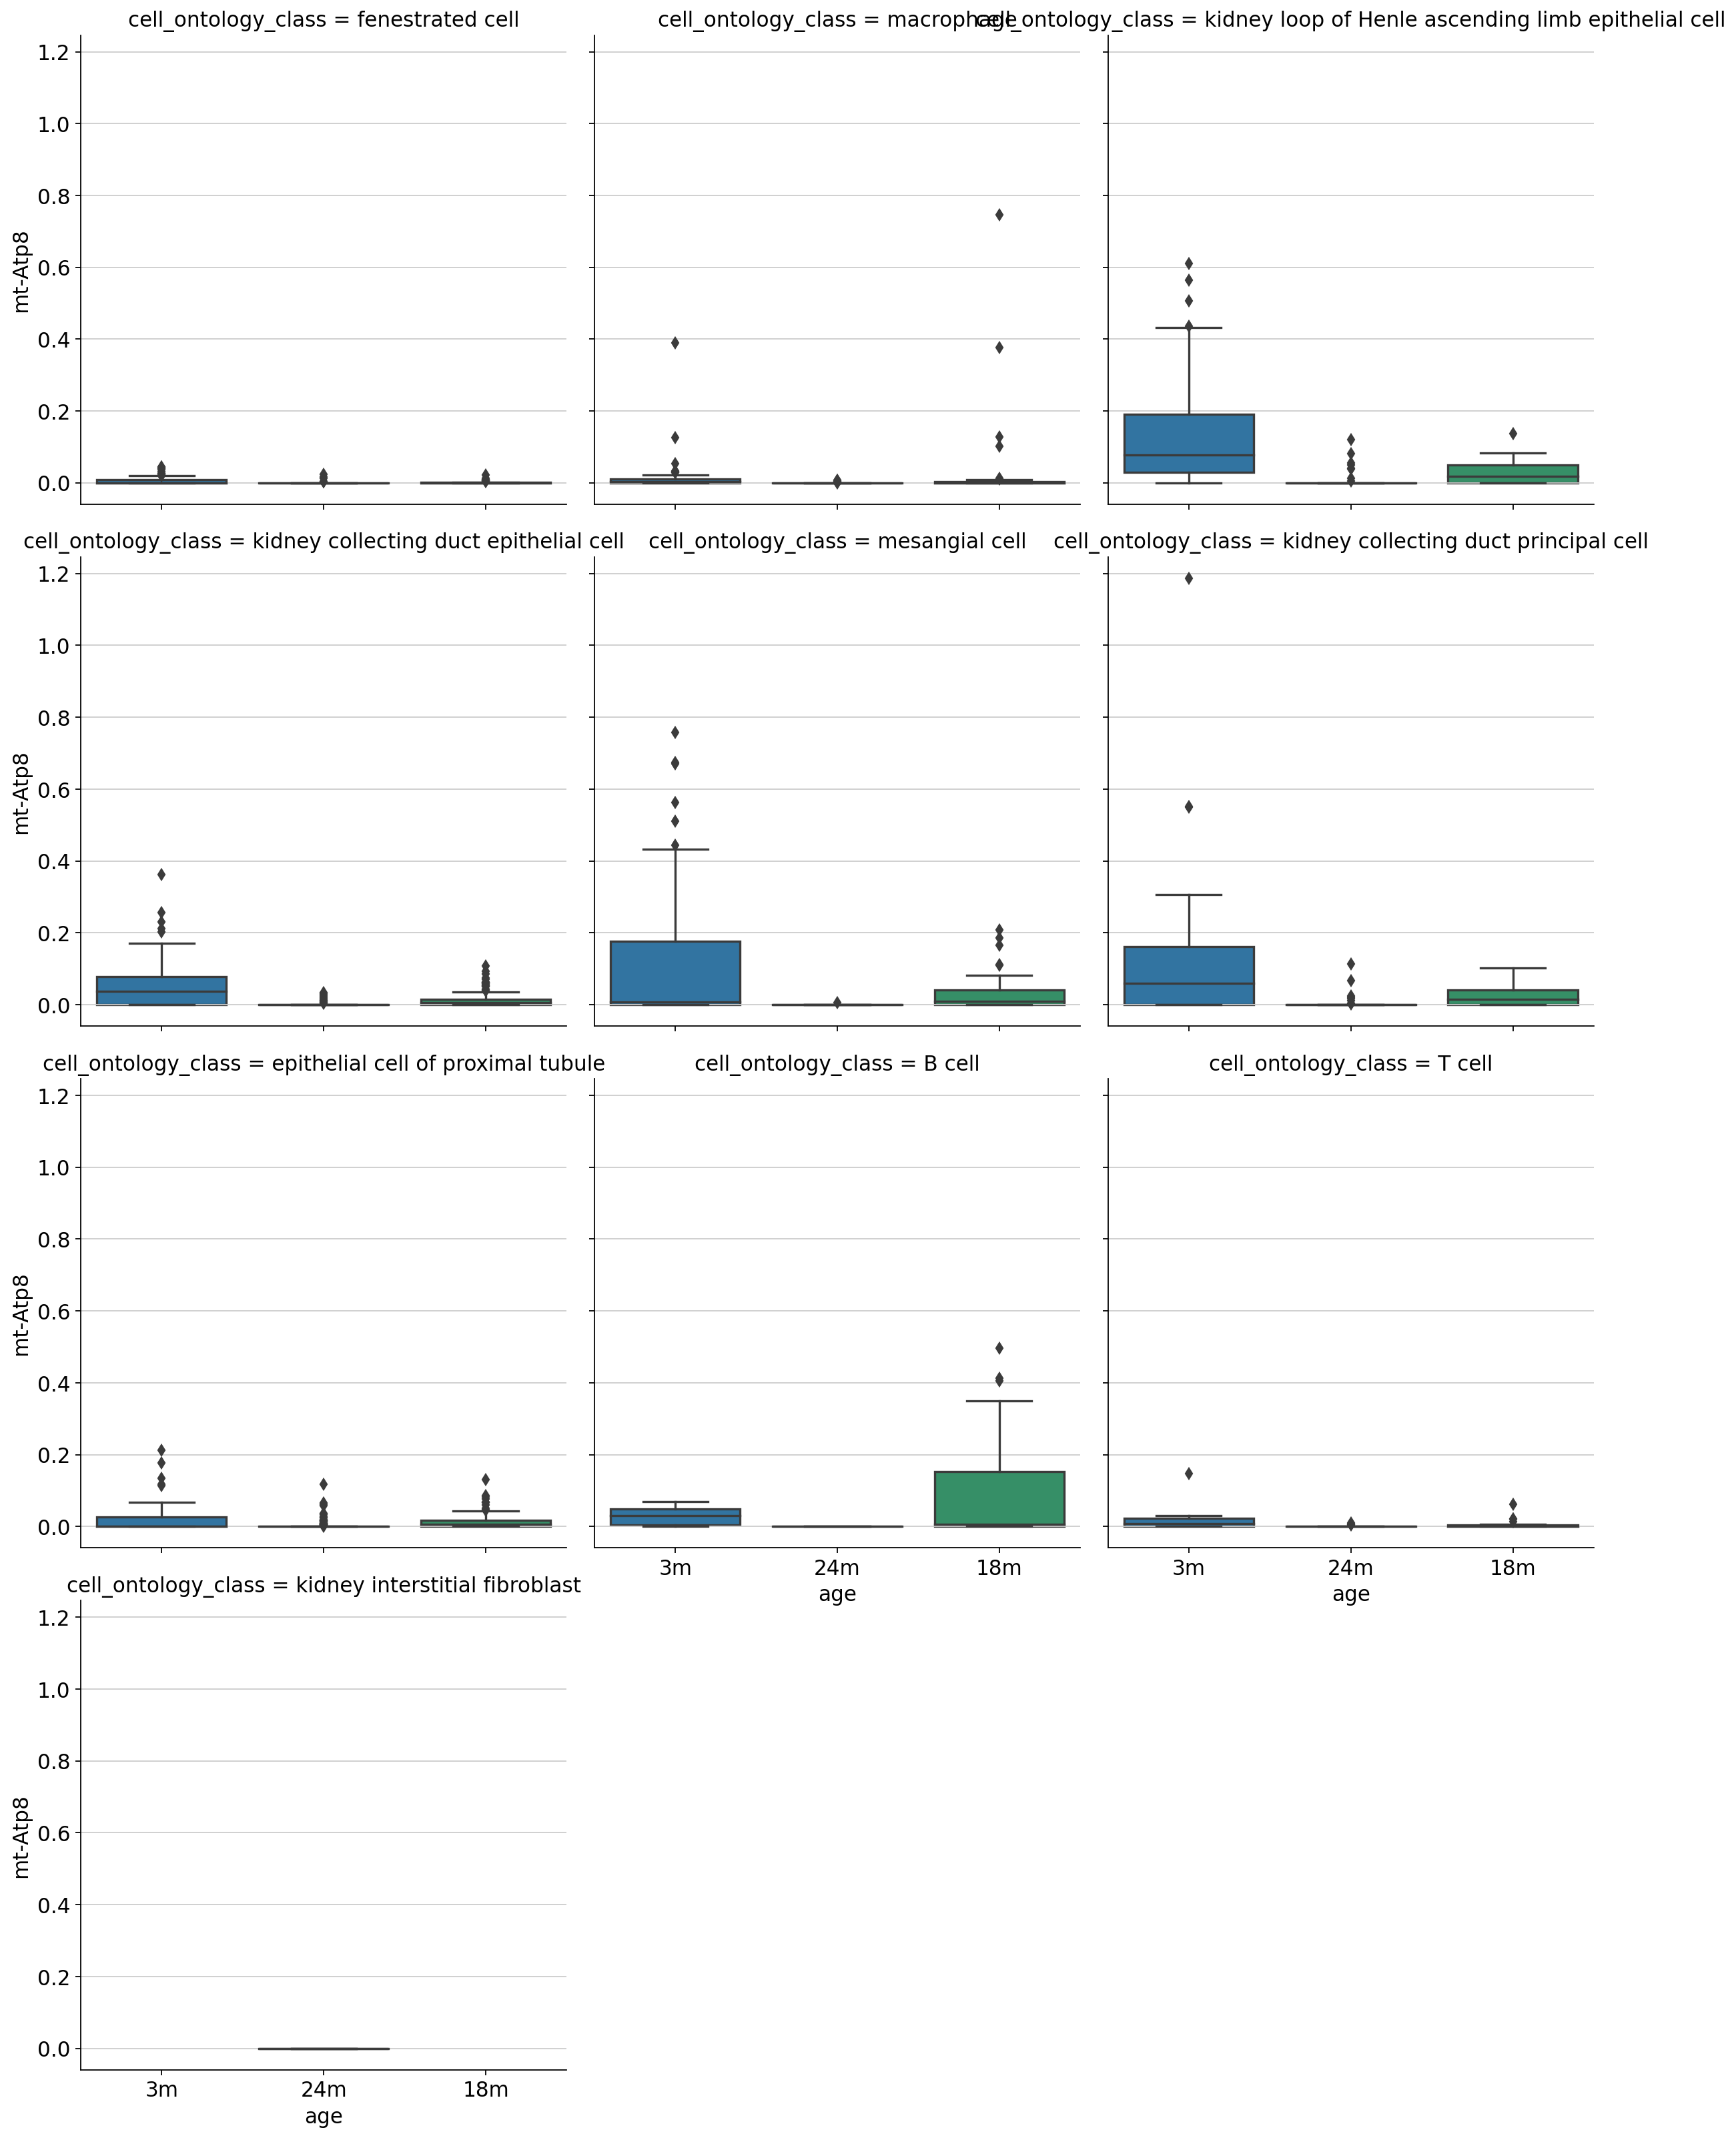

In [26]:
''' [] cells expressing [] gene across ages'''
g = tissue[:,'mt-Atp8'].copy() #only has this gene
#g = g[g.obs.cell_ontology_class=='B cell'].copy() 
g.obs['mt-Atp8']=g[:,'mt-Atp8'].X.toarray().flatten() 
g = g.obs.copy()

sns.catplot(data = g, x='age', y = 'mt-Atp8', col = 'cell_ontology_class',col_wrap=3, kind = 'box')

# Characterize cell proportions across ages

In [ ]:
from collections import defaultdict

def cell_per_tissue(celltypelist, adata):
    ''' Input is cell type list. Output is a pandas DataFrame 
    of the percentage of that cell type for inputted subsetted adata tissue object'''
    
    data = defaultdict(list)
    
    for a in ages:
        b = adata[adata.obs['age']== a]#filter by age
        for e in celltypelist:#going through keys/tissue types       
            c = b[b.obs['cell_ontology_class']== e]#have adata filtered by cell types in list
            tissue_cell_count = adata.n_obs
            data["Age"].append(a)
            data["Cell Type"].append(e)
            data["Cell Count"].append(c.n_obs)
            data["Cell Type/Tissue %"].append((c.n_obs/b.n_obs)*100)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
df = cell_per_tissue(tis_cells,tissue)

sns.set_style('whitegrid')
fig = plt.figure(figsize=(17, 5))
plt.xticks(rotation=90)
sns.set(font_scale =1)
sns.barplot(data=df, y="Cell Type/Tissue %", x="Cell Type", hue = "Age").set(title="Cell Type % of Thymus")

In [ ]:
mouse_ids = list(set(tissue.obs['mouse.id']))

In [ ]:
from collections import defaultdict

def cell_per_tissue2(a_list, adata):
    ''' Input is list and adata tissue object. Output is a pandas DataFrame 
    of the percentage of that cell type for inputted subsetted adata tissue object'''
    
    data = defaultdict(list)
    
    for a in a_list:
        b = adata[adata.obs['mouse.id']== a]#filter by mouse
        for c in tis_cells:       
            d = b[b.obs['cell_ontology_class']== c]#have adata filtered by cell types in list
            tissue_cell_count = b.n_obs
            
            data["mouse.id"].append(a)
            data["Cell Type"].append(c)
            data["Cell Count"].append(d.n_obs)
            data["Cell Type/Tissue %"].append((d.n_obs/b.n_obs)*100)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
df2=cell_per_tissue2(mouse_ids,tissue)

In [ ]:
df2.groupby(["mouse.id"])[["Cell Type/Tissue %"]].sum()#don't think i need
dd = df2.groupby(["mouse.id", "Cell Type"]).sum()

In [ ]:
dd = dd.reset_index('Cell Type')

Pivoting pandas DataFrame so that Cell Type column values becomes columns, and Cell Type/Tissue % populate new columns.

In [ ]:
tmp = dd.pivot_table(values='Cell Type/Tissue %', columns="Cell Type", index=dd.index)

Reordering mouse.id X axis

In [ ]:
mouse_id_order = [
    '3_8_M', 
    '3_9_M',
    '3_11_M', 
    '3_38_F', 
    '3_39_F', 
    '18_45_M', 
    '18_46_F', 
    '18_47_F', 
    '18_53_M', 
    '24_58_M', 
    '24_59_M',
    '24_60_M', 
    '24_61_M', 
]

tmp = tmp.reindex(mouse_id_order)

**Cell Type % of Thymus per Mouse**

In [ ]:
tmp.plot(kind='bar', stacked=True, figsize=(12, 10), color = ['pink','indigo','gold','royalblue','mediumorchid','powderblue','red','green','navy','orange'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, facecolor = 'white')
plt.title("Cell Type % of Kidney per Mouse")
plt.ylabel('Cell Type %')
ax = plt.axes()
ax.set_facecolor("white")


**Cell Type % of Thymus by Age**

In [ ]:
from collections import defaultdict

def cell_per_age(a_list, adata):
    ''' Input is list and adata tissue object. Output is a pandas DataFrame 
    of the percentage of that cell type by age for inputted subsetted adata tissue object'''
    
    data = defaultdict(list)
    
    for a in a_list:
        b = adata[adata.obs['age']== a]#filter by age
        for c in tis_cells:       
            d = b[b.obs['cell_ontology_class']== c]#have adata filtered by cell types in list
            tissue_cell_count = b.n_obs
            
            data["age"].append(a)
            data["Cell Type"].append(c)
            #data["Cell Count"].append(d.n_obs)
            data["Cell Type/Tissue %"].append((d.n_obs/b.n_obs)*100)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
ac = cell_per_age(ages,tissue)

In [ ]:
ad = ac.groupby(["age", "Cell Type"]).sum()

In [ ]:
ad = ad.reset_index('Cell Type')

In [ ]:
ae = ad.pivot_table(values='Cell Type/Tissue %', columns="Cell Type", index=ad.index)
ae = ae.reindex(ages)

In [ ]:
ae.plot(kind='bar', stacked=True, figsize=(4, 5), color = ['pink','indigo','gold','royalblue','mediumorchid','powderblue','red','green','navy','orange'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, facecolor = 'white')
plt.title("Cell Type % of Thymus by Age")
plt.ylabel('Cell Type %')
ax = plt.axes()
ax.set_facecolor("white")

**Variance of Cell Type % of Thymus across Age**

* I'd like to break apart the macrophage cluster (shows two leiden clusters) into two categories and plot

In [ ]:
sns.catplot(data = ad, x = 'Cell Type', y = 'Cell Type/Tissue %', kind = "box", palette=sns.color_palette(['pink','indigo','gold','royalblue','mediumorchid','powderblue','red','green','navy','orange']))
plt.title("Variance of Cell Type % of Thymus across Age")
sns.set_style("whitegrid")
plt.xticks(rotation=90);


# Gene expression vars->obs & dataframe

In [3]:
def remove_cats(adata):

    cat_columns = adata.obs.select_dtypes(['category']).columns
    adata.obs[cat_columns] = adata.obs[cat_columns].astype(str)
    
    return adata

In [4]:
tissue = remove_cats(tissue)

In [ ]:
'''Angela showing me some pandas tricks and suggestions'''

pd.DataFrame(tissue.obs.groupby(["age",'mouse.id', 'cell_ontology_class']).agg({"mouse.id":[len]}))

score_genes

In [ ]:
sc.tl.score_genes(tissue, bcr, score_name = 'BCR')

In [ ]:
sc.tl.score_genes(tissue, mt_genes, score_name = 'MT_GENES')

In [ ]:
sc.tl.score_genes(tissue, mt_nc_genes, score_name = 'NC_MT_GENES')

To add var gene expression to obs

In [11]:
def gene_expression_obs(adata, listy):
    '''Takes adata object. 
    Returns adata copy with var genes where genes 
    and their expression values are columns in dataframe of adata.'''
    adata2 = adata.copy()
    
    for j in listy:#list(adata2.var.index): took hours & didn't finish
        adata2.obs[j] = adata2[:,j].X.toarray().flatten()
    
    return adata2

To make dataframe from obs gene expression adata

In [12]:
def gene_expression_df(adata, genelist):
    '''Takes adata object and a list of genes. 
    Returns a pandas dataframe where genes and their expression values are columns in dataframe of adata.'''
    df = adata.obs.copy()
    
    for g in genelist:
        df[g] = tissue[:,g].X.toarray().flatten()
    return df   

Removing genes from MitoCarta gene list that are not in .vars

In [13]:
genes = list(mt_nc.copy())

for i in range(len(ignored)):
    for i in ignored:
        if i in genes:
            genes.remove(i) 

In [14]:
'''Checking for duplicate genes'''
dupe_genes = []
for g in genes:
    count = genes.count(g)
    if count > 1:
        dupe_genes.append(g)
print(f'There are {len(dupe_genes)} duplicate genes in genes list')

There are 0 duplicate genes in genes list


In [15]:
'''Checking that all MT genes are in genes (mt_nc) list'''

for m in mt_genes:
    if m in genes:
        print(m,'yes')
    else:
        print(m, 'no') 

mt-Atp6 yes
mt-Atp8 yes
mt-Co1 yes
mt-Co2 yes
mt-Co3 yes
mt-Cytb yes
mt-Nd1 yes
mt-Nd2 yes
mt-Nd3 yes
mt-Nd4 yes
mt-Nd4l yes
mt-Nd5 yes
mt-Nd6 yes
mt-Rnr1 yes
mt-Rnr2 yes
mt-Ta yes
mt-Te yes
mt-Tf yes
mt-Ti yes
mt-Tl1 yes
mt-Tl2 yes
mt-Tm yes
mt-Tp yes
mt-Tq yes
mt-Tt yes
mt-Tv yes


**DataFrames**

In [ ]:
#may be too large?

#df_nc_mt = gene_expression_df(tissue_sg1,list(tissue_sg1.var.index))

In [ ]:
#tissue_obs = gene_expression_obs(tissue, list(tissue.var.index)) has ALL genes but running for hoooours
#need to figure out how to save it

In [16]:
#adata has mitochondria and nuclear-encoded mitochondria (MitoCarta3.0) gene expressions in obs
tissue2 = gene_expression_obs(tissue, genes)

In [17]:
#df has mitochondria and nuclear-encoded mitochondria (MitoCarta3.0) gene expressions
tissue3 = gene_expression_df(tissue2, genes)

In [18]:
#df has BCR genes
tissueBCR_obs = gene_expression_obs(tissue, bcr)
tissueBCR = gene_expression_df(tissueBCR_obs, bcr)

In [ ]:
j = ['Jchain', 'Ighg2b','Cpt1a', 'Slc2a1','Slc2a3', 'Foxo1', 'Immp2l', 'Cd19','Cd27','Cd38']
jchain_kid = gene_expression_obs(tissue, j)
df_kid = gene_expression_df(jchain_kid, j)

## leiden cluster breakdown

Only the clusters that have annotated B cells present

In [ ]:
leiden14 = tissue[tissue.obs['leiden']=='14']
l = pd.crosstab(leiden14.obs['cell_ontology_class'],leiden14.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden12 = tissue[tissue.obs['leiden']=='12']
l = pd.crosstab(leiden12.obs['cell_ontology_class'],leiden12.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden13 = tissue[tissue.obs['leiden']=='13']
l = pd.crosstab(leiden13.obs['cell_ontology_class'],leiden13.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
leiden16 = tissue[tissue.obs['leiden']=='16']
l = pd.crosstab(leiden16.obs['cell_ontology_class'],leiden16.obs['age'], normalize='index')
l.plot.bar(stacked=True).legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

In [ ]:
tmp = pd.crosstab(tissue.obs['leiden'],tissue.obs['cell_ontology_class'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0, facecolor = 'white')

# MT and MitoCarta score_genes

**Save MT score_genes result** (unhash if doing for the first time)

* score_genes_cell_cycle(adata, s_genes, g2m_genes)
* mt_genes -> s_genes
* mt_nc_genes -> g2m_genes

A function to make a dataframe of gene_scores and gene expression score by cell

In [ ]:
def cell_gene_exp_df(adata, gene):
    ''' Input is gene name that has an obs.gene_score. 
    Output is a pandas DataFrame with two columns: cell index and gene's gene_score'''
    
    data = defaultdict(list)
    
    for d in list(adata.obs['cell']):
        data["Cell"].append(d)
        
        cg = adata[adata.obs.cell == d, adata.var.index == gene]
        data["Gene Expression"].append(cg.X[0,0]) 
    
    #for g in list(adata.obs[gene]):
    #    data["gene_score"].append(g)
       
    df = pd.DataFrame(data)
    return df

# Statistics tests on gene expression

Need to run **8 Gene expression vars -> obs & dataframe** first

## statannot plots

### score_genes for mt genes |B

In [ ]:
#Don't really think score_genes can be used for mt-encoded genes

df = tissue3[['age','cell_ontology_class','MT_GENES']]

x = "cell_ontology_class" 
y = "MT_GENES" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

### Nc-encoded MT genes [N]

In [ ]:
#score_genes
df = tissue3[['age','cell_ontology_class','NC_MT_GENES']]

x = "cell_ontology_class" 
y = "NC_MT_GENES" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

### mt-genes

#### mt-Atp6 | T (18 vs 24)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.595e-01 U_stat=1.300e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.070e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.661e-02 U_stat=6.200e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.061e-06 U_stat=2.616e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.319e-26 U_stat=2.360e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.503e-01 U_stat=3.661e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.411e-05 U_stat=2.017e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.718e-01 U_stat=1.535e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.056e-03 U_stat=1.808e+03
mesangial cell_3m v.s. mesangial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.285e+02
macrophage_3m v.s. macrophage_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Atp6'>,
  <statannot.StatResult.StatResult at 0x7fdadb87fb20>])

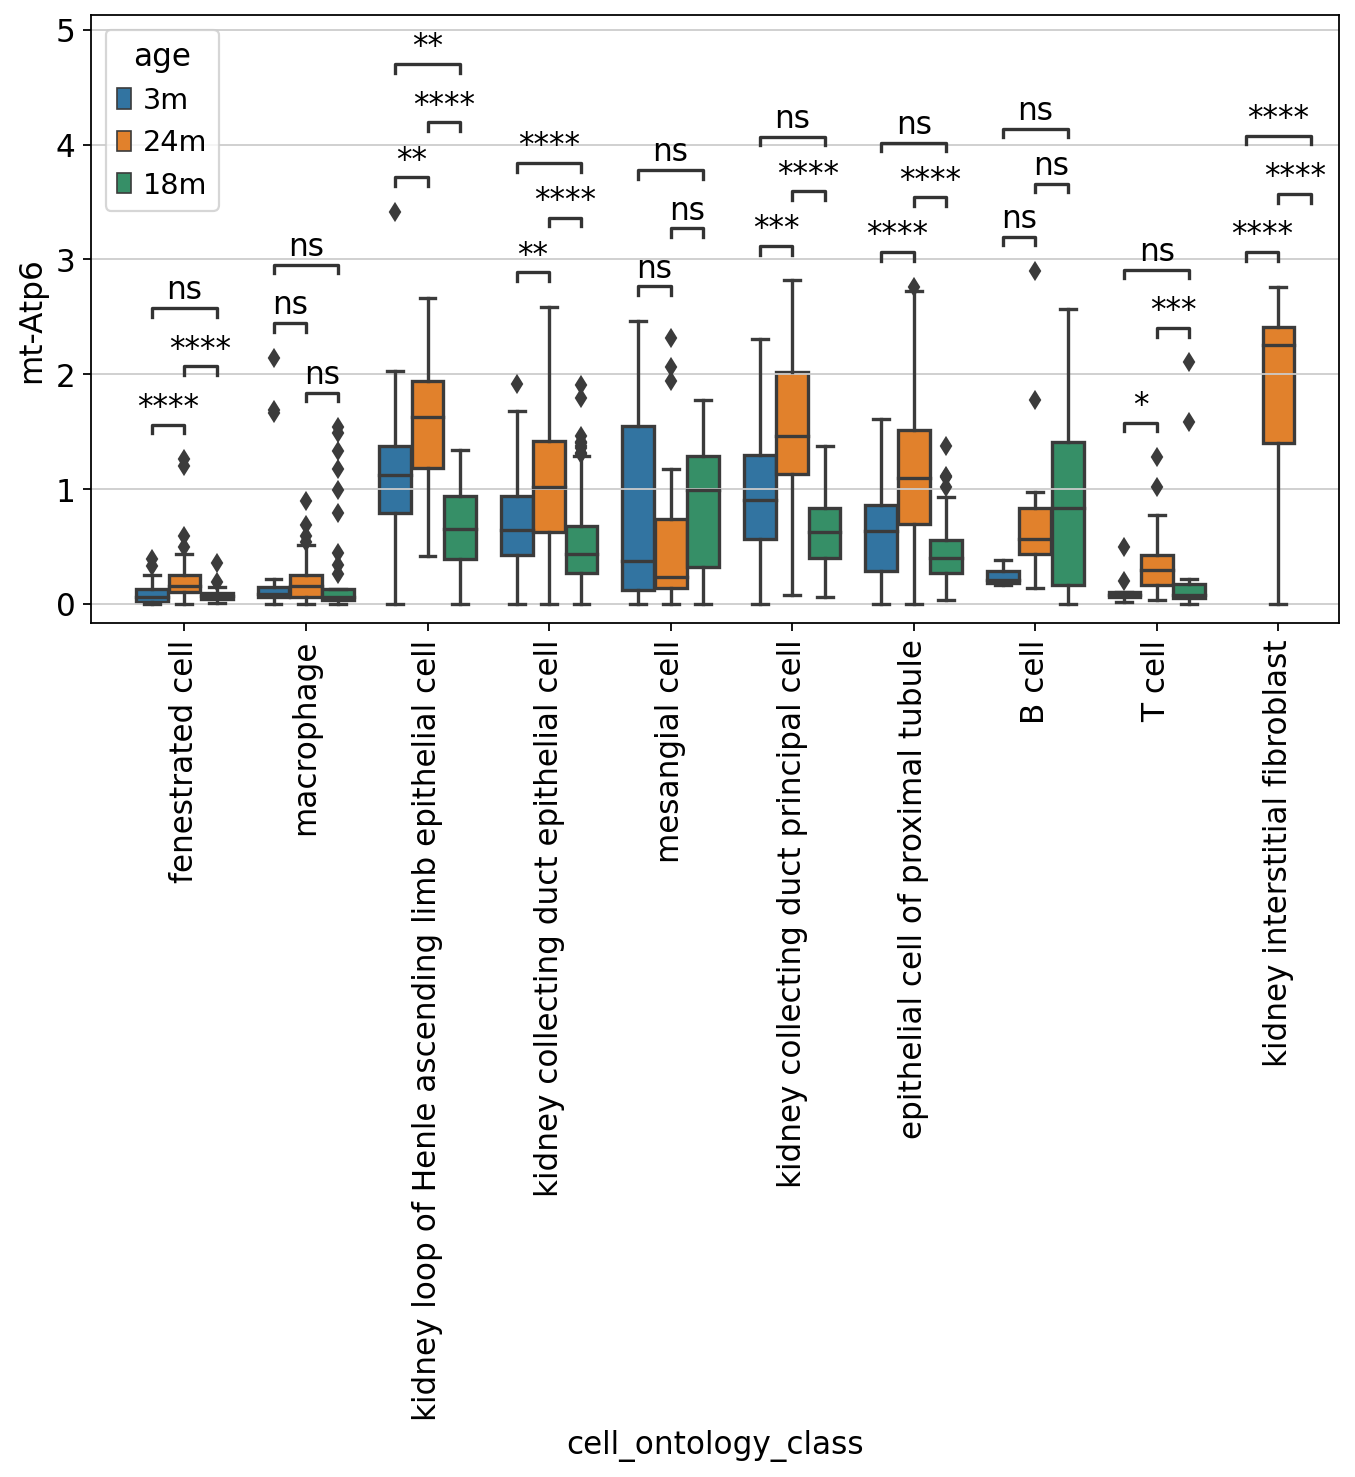

In [27]:
df = tissue3[['age','cell_ontology_class','mt-Atp6']]

x = "cell_ontology_class" 
y = "mt-Atp6" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Atp8 |B , T , M. all: (3v18, 18v24)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.160e-02 U_stat=8.500e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.899e-03 U_stat=2.380e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.938e-03 U_stat=3.200e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.270e-03 U_stat=6.360e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.190e-14 U_stat=7.518e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

ValueError: All numbers are identical in mannwhitneyu

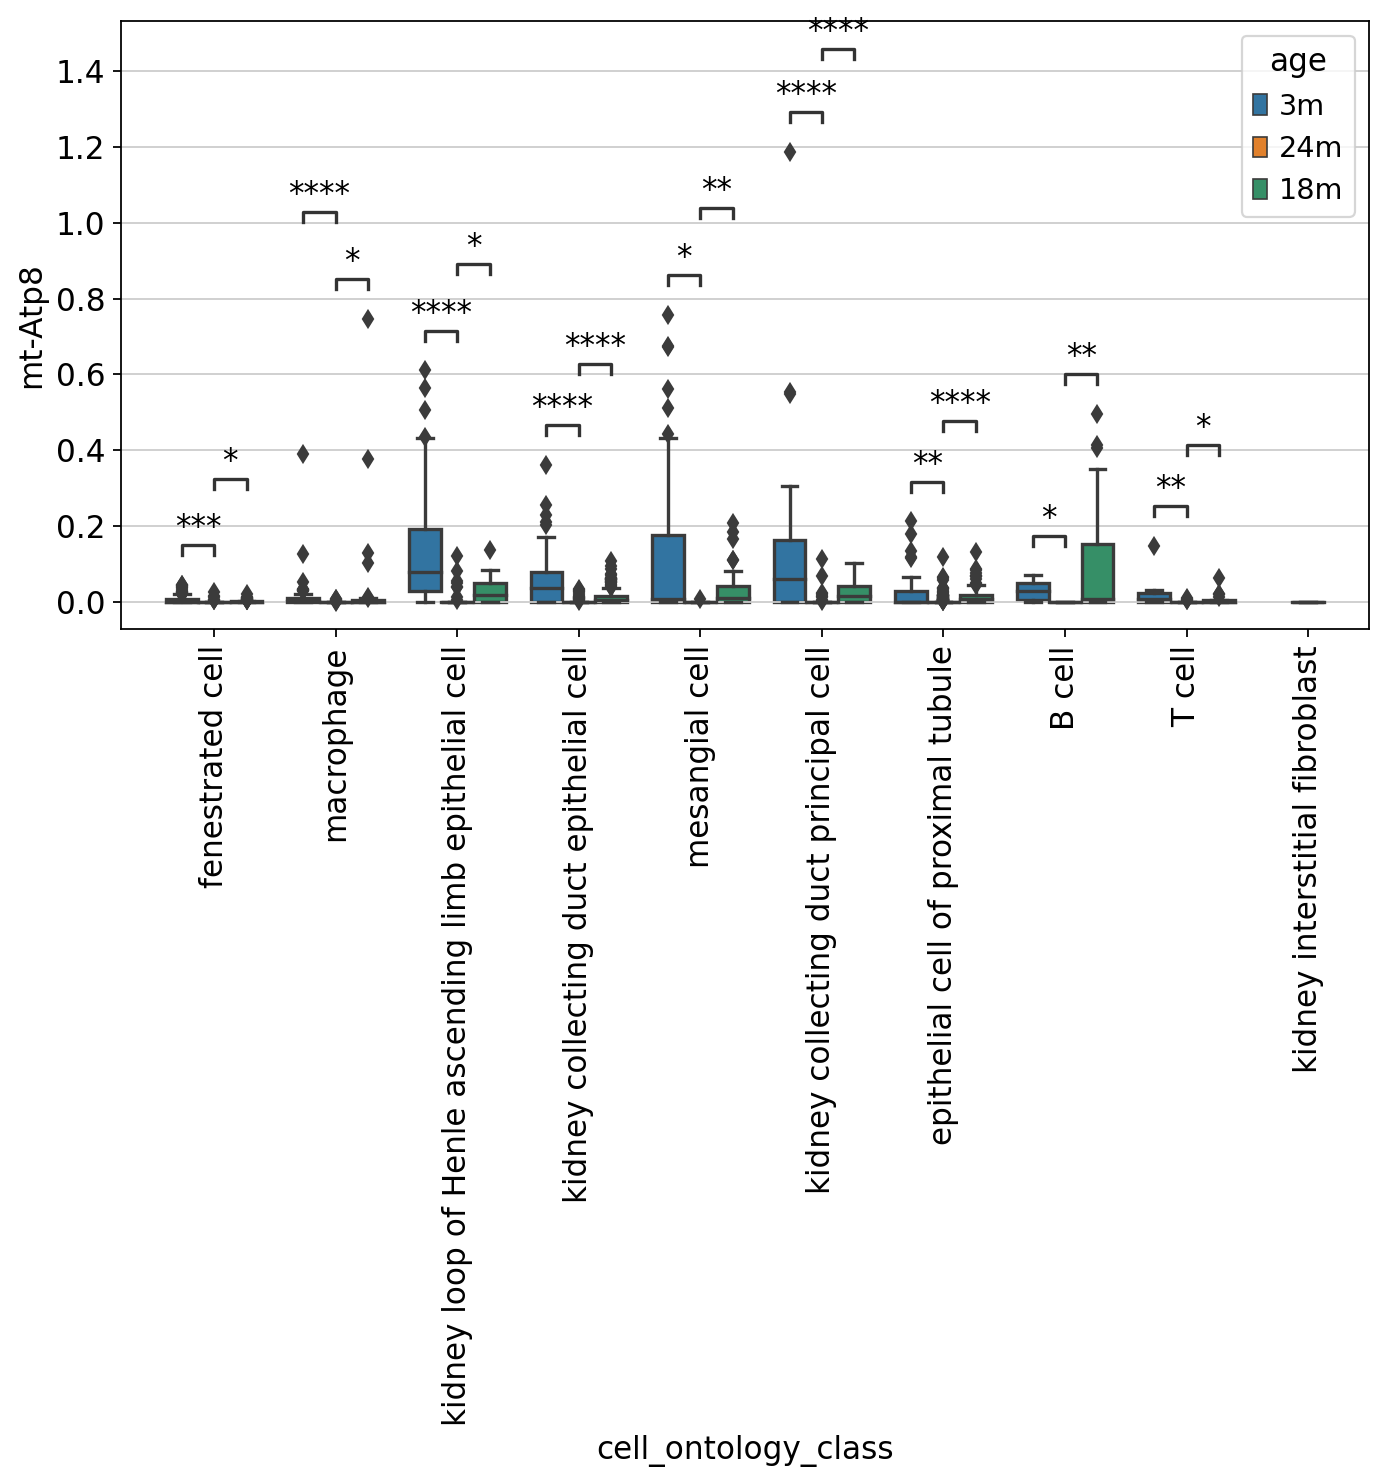

In [22]:
df = tissue3[['age','cell_ontology_class','mt-Atp8']]

x = "cell_ontology_class" 
y = "mt-Atp8" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Co1 |B (3v24)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.227e-01 U_stat=1.900e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.720e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.230e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.493e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.420e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.637e-02 U_stat=3.100e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.573e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.031e-02 U_stat=1.873e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.259e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.453e+03
mesangial cell_3m v.s. mesangial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correct

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Co1'>,
  <statannot.StatResult.StatResult at 0x7fdadb50a400>])

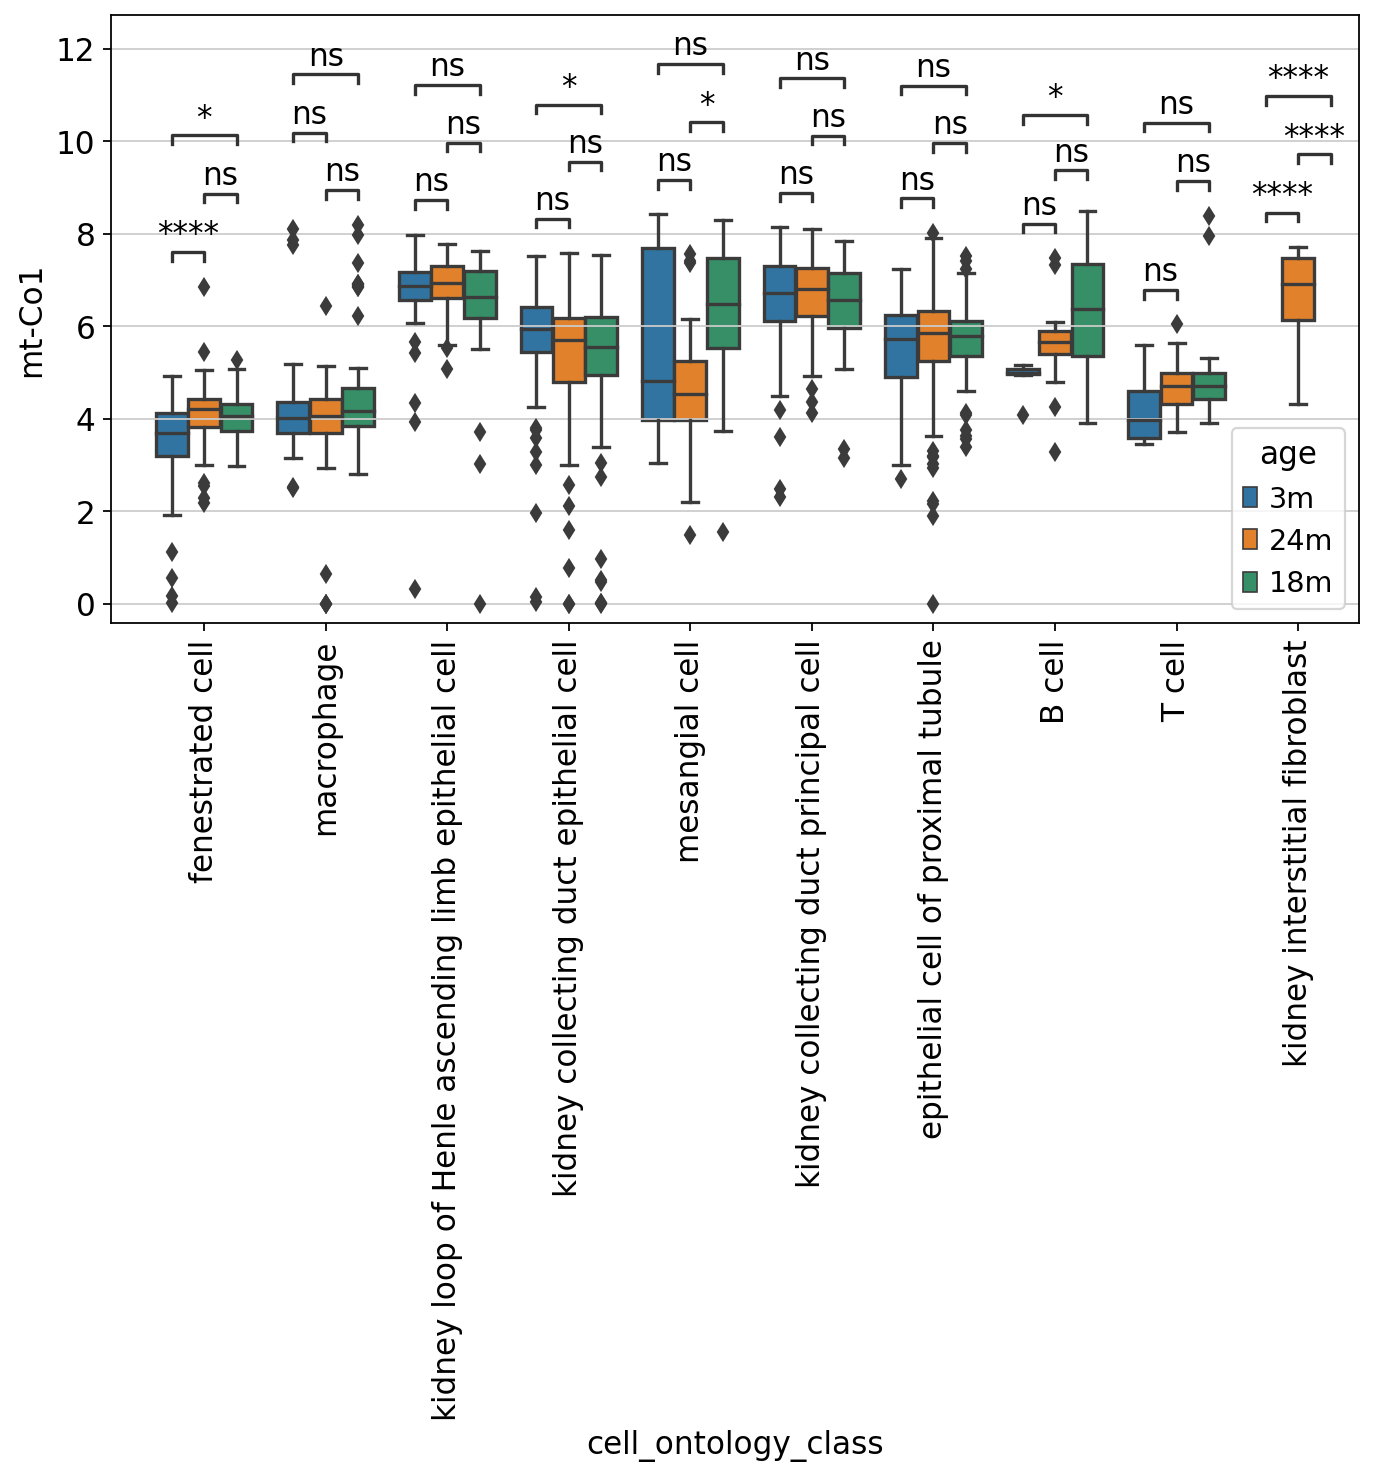

In [29]:
df = tissue3[['age','cell_ontology_class','mt-Co1']]

x = "cell_ontology_class" 
y = "mt-Co1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Co2 |T, M. both (3v18, 18v24)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.966e-02 U_stat=7.000e+00
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.030e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.218e-04 U_stat=2.300e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.417e-10 U_stat=1.891e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.550e-29 U_stat=2.409e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_3m v.s. kidney interstitial fibroblast_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.068e-02 U_stat=4.400e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.219e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.538e-01 U_stat=1.777e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_va

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Co2'>,
  <statannot.StatResult.StatResult at 0x7fdadb1de7c0>])

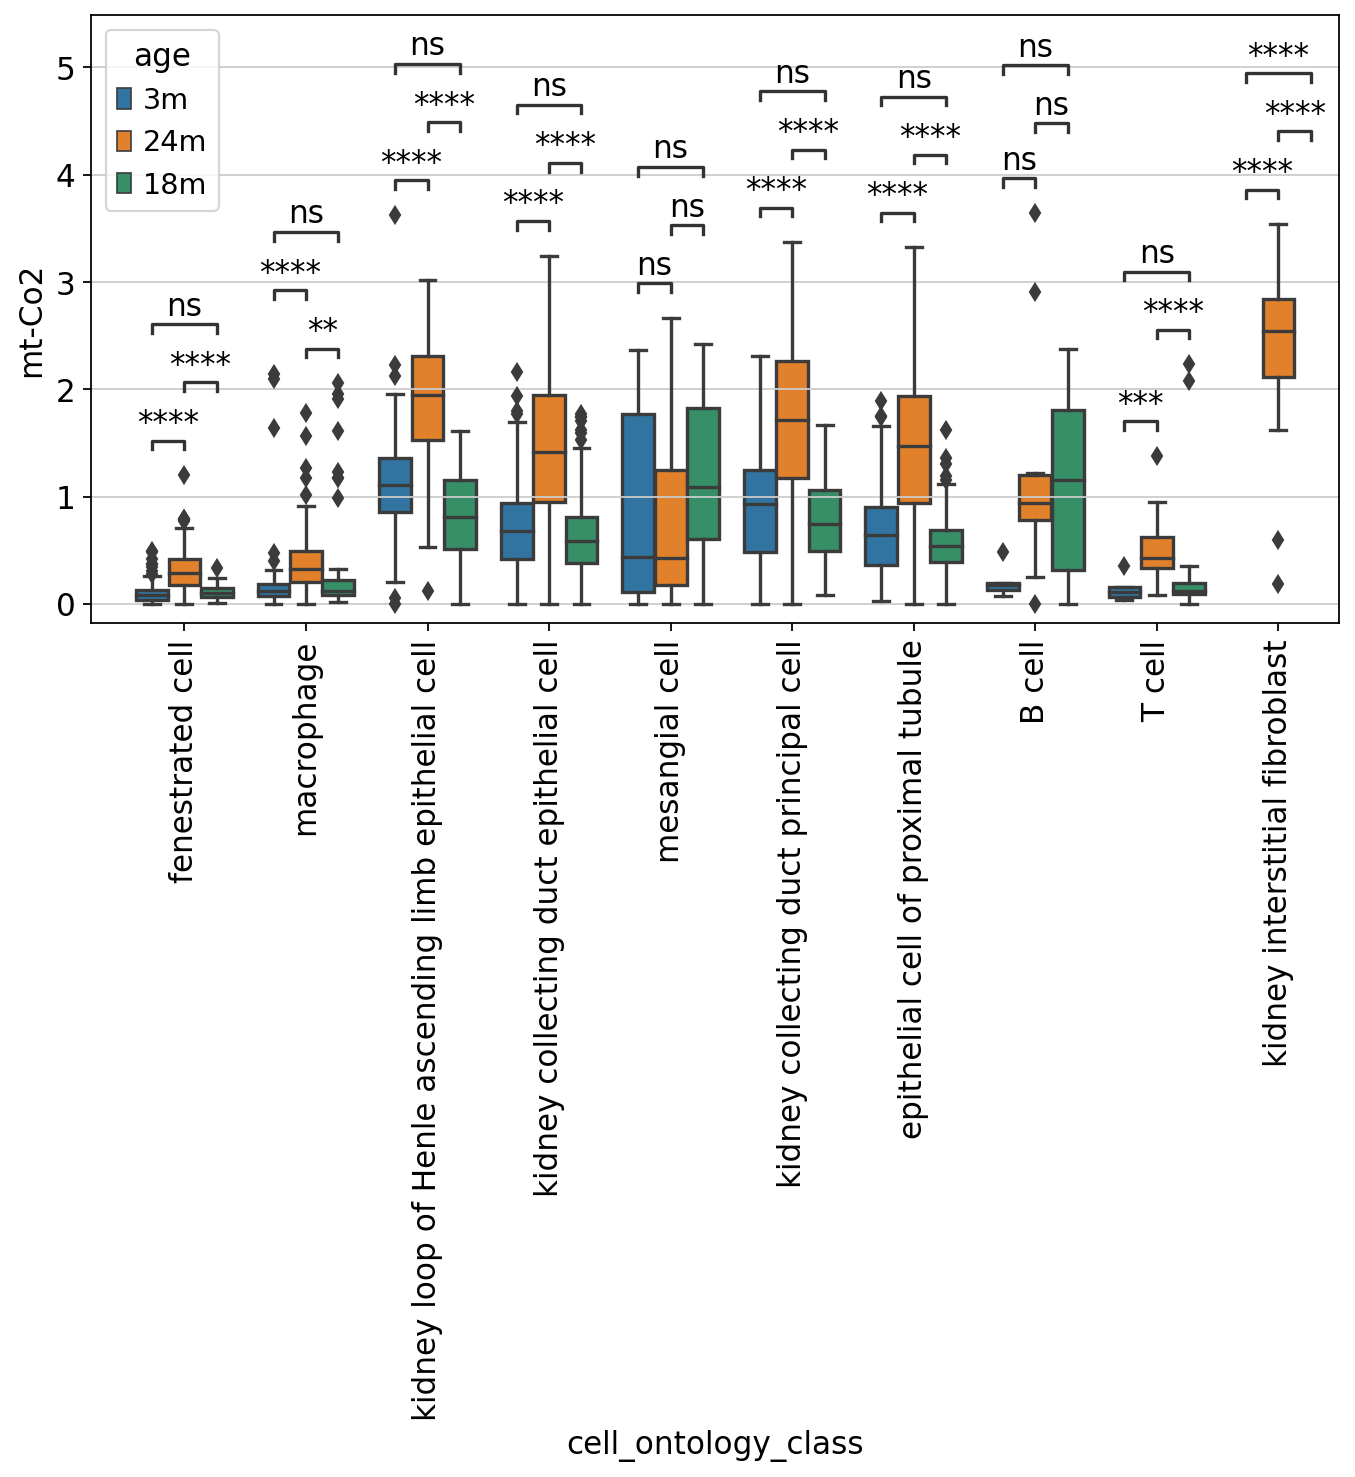

In [30]:
df = tissue3[['age','cell_ontology_class','mt-Co2']]

x = "cell_ontology_class" 
y = "mt-Co2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Co3 | T (3v18)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.881e-01 U_stat=1.500e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.560e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.973e-02 U_stat=7.000e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.560e-04 U_stat=2.933e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.103e-23 U_stat=2.304e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_3m v.s. kidney interstitial fibroblast_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.030e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.880e-01 U_stat=3.556e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.639e-06 U_stat=2.079e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_va

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Co3'>,
  <statannot.StatResult.StatResult at 0x7fdadaee2370>])

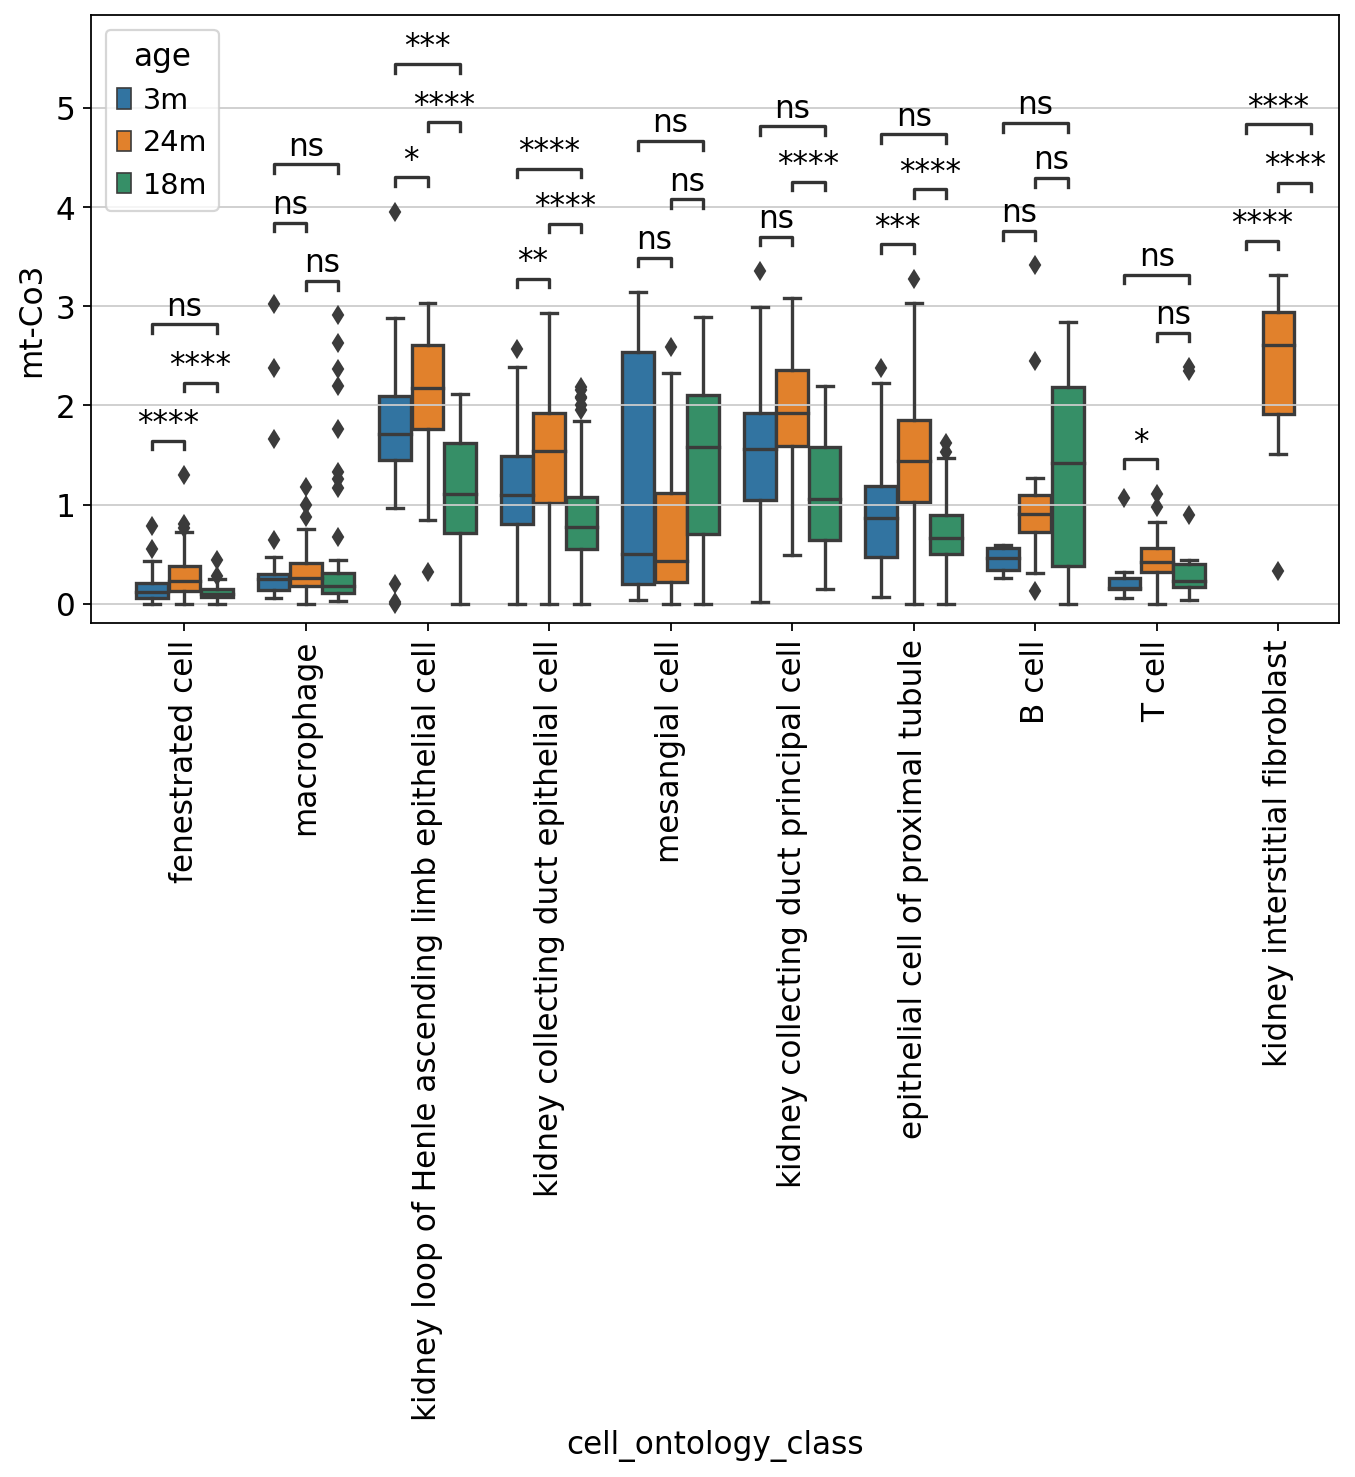

In [31]:
df = tissue3[['age','cell_ontology_class','mt-Co3']]

x = "cell_ontology_class" 
y = "mt-Co3" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Cytb | B (18v24)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.800e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.226e-03 U_stat=1.980e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.480e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.145e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.489e-03 U_stat=1.724e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.642e-01 U_stat=5.600e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.947e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.587e-02 U_stat=1.847e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.273e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test 

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Cytb'>,
  <statannot.StatResult.StatResult at 0x7fdadabdcf70>])

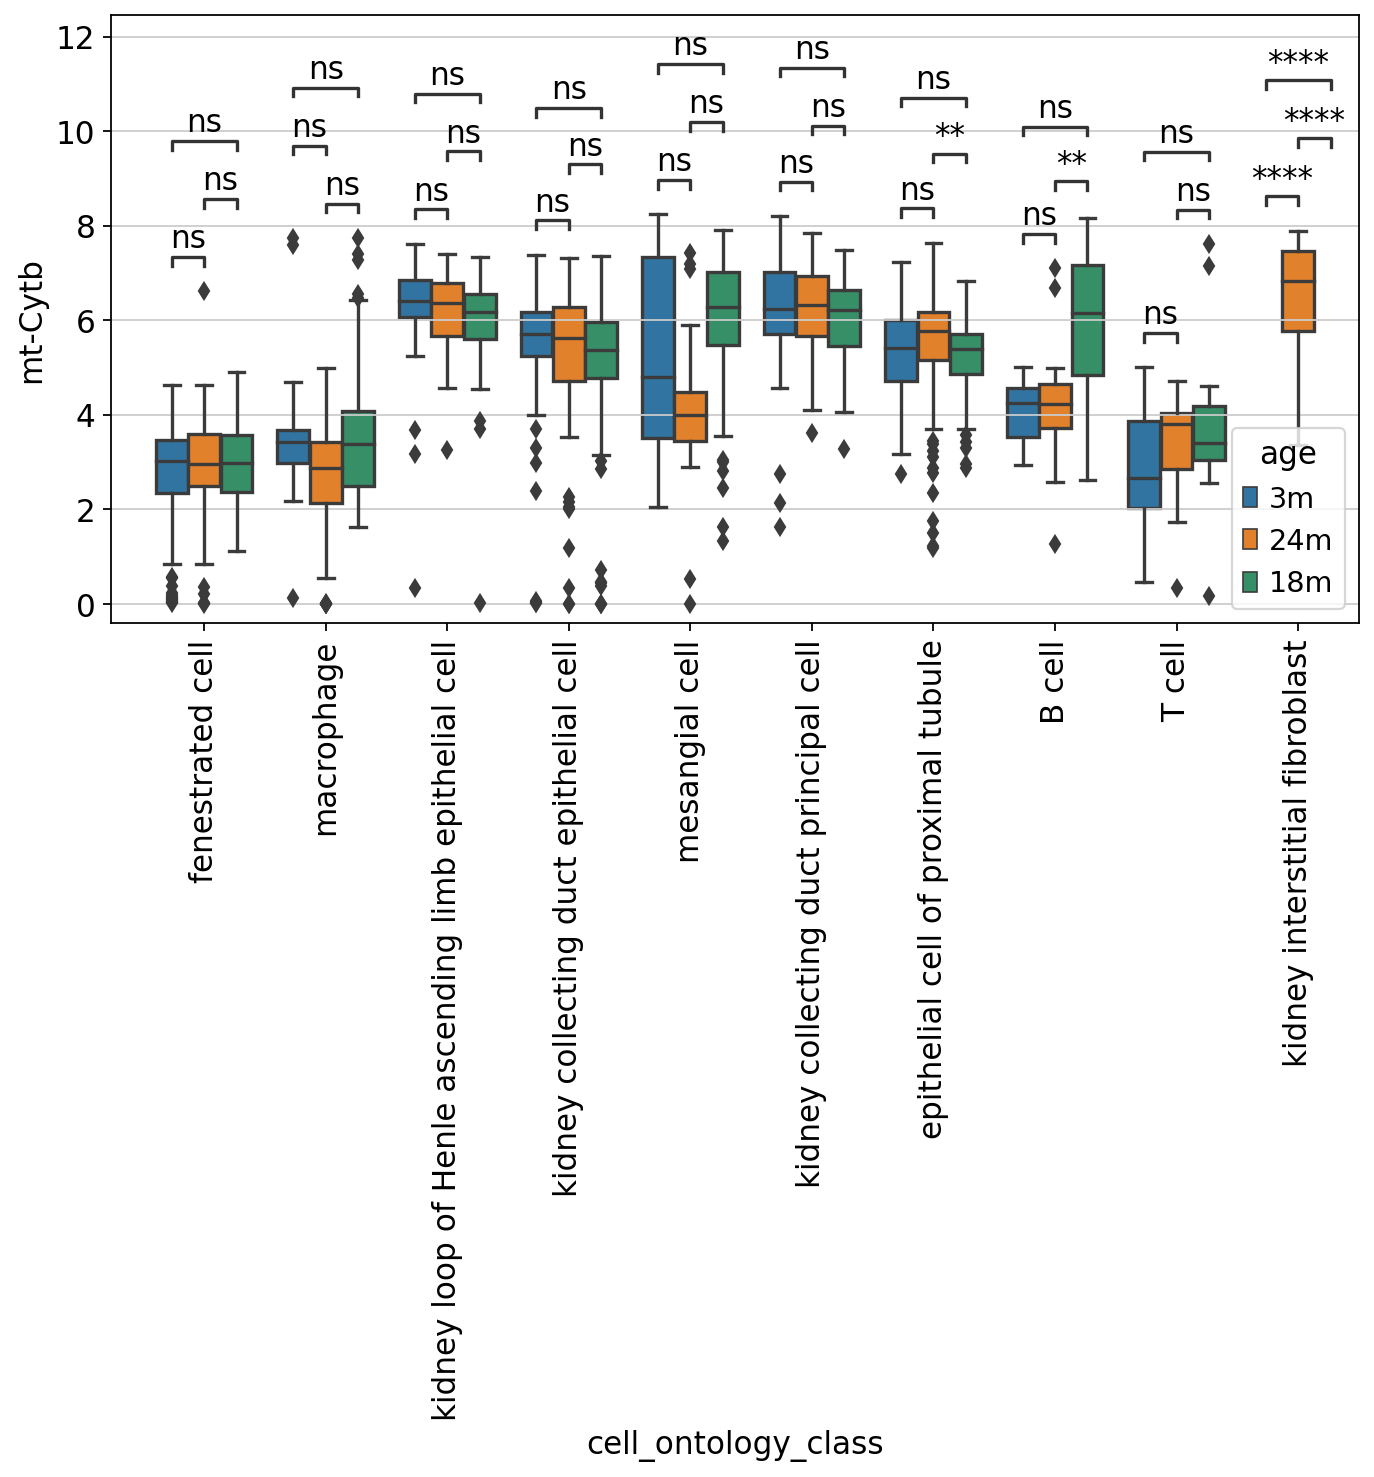

In [32]:
df = tissue3[['age','cell_ontology_class','mt-Cytb']]

x = "cell_ontology_class" 
y = "mt-Cytb" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd1

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.900e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.438e-02 U_stat=2.740e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.750e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.038e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.229e-01 U_stat=1.636e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_3m v.s. kidney interstitial fibroblast_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.475e-01 U_stat=7.500e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.004e-02 U_stat=3.882e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.237e-07 U_stat=2.121e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_va

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Nd1'>,
  <statannot.StatResult.StatResult at 0x7fdada897640>])

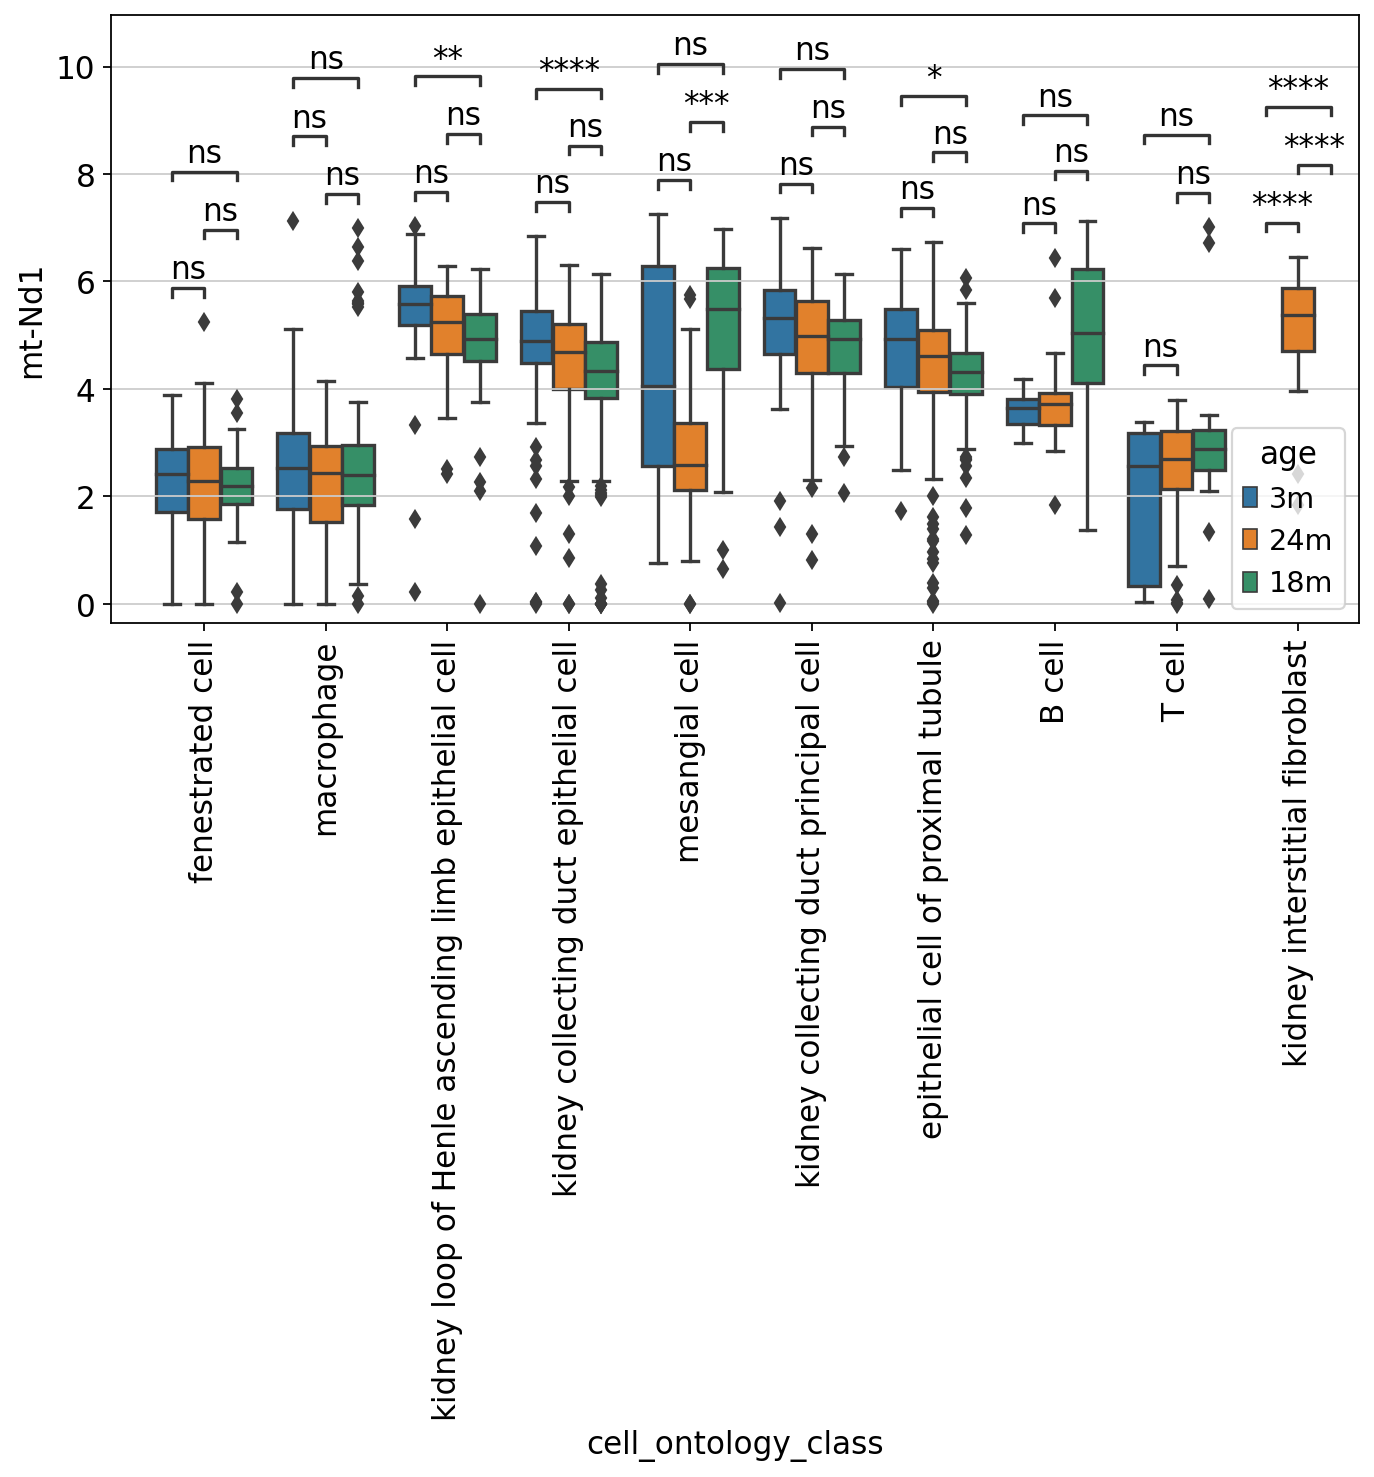

In [33]:
df = tissue3[['age','cell_ontology_class','mt-Nd1']]

x = "cell_ontology_class" 
y = "mt-Nd1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd2 |B (18v24)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.200e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.752e-02 U_stat=2.570e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.940e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.944e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.668e-01 U_stat=1.584e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.780e-02 U_stat=4.700e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.204e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.775e-01 U_stat=1.781e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.302e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test 

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Nd2'>,
  <statannot.StatResult.StatResult at 0x7fdada54b490>])

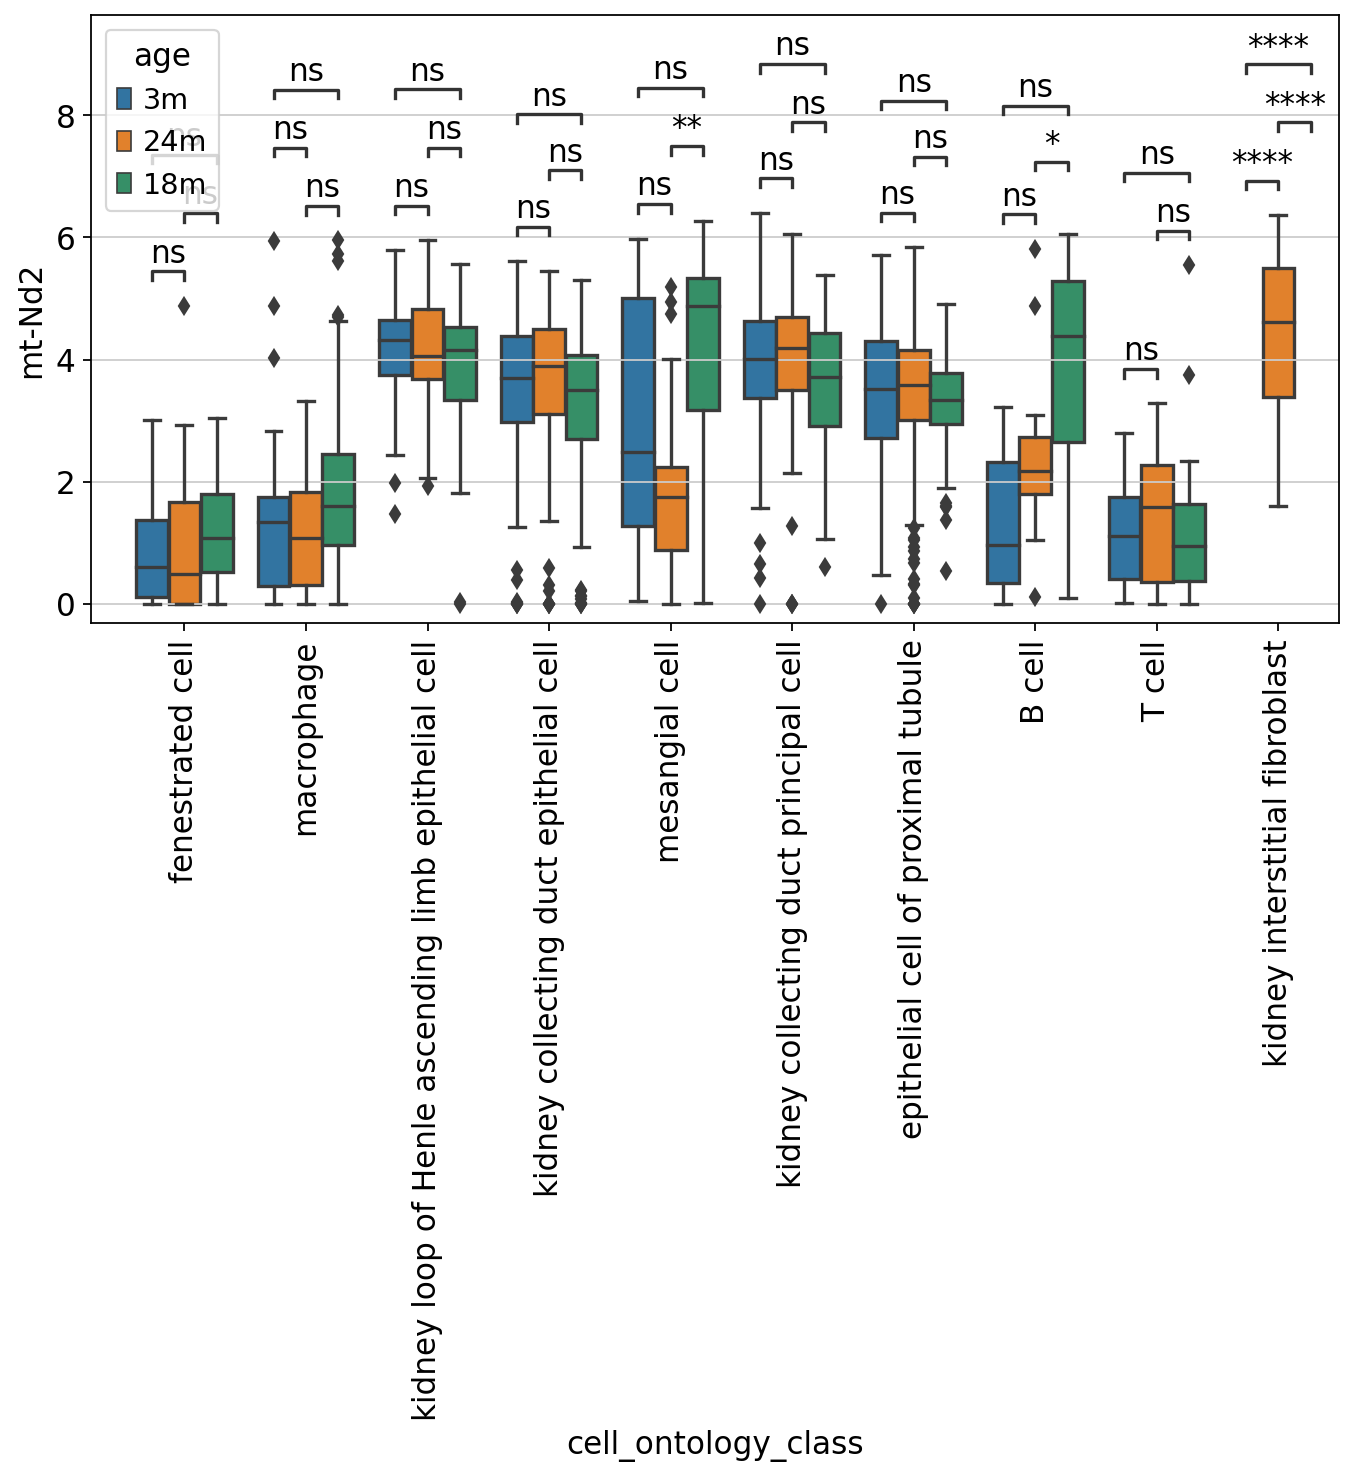

In [34]:
df = tissue3[['age','cell_ontology_class','mt-Nd2']]

x = "cell_ontology_class" 
y = "mt-Nd2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd3 |B (18v24)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.700e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.011e-02 U_stat=2.220e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.970e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.359e-02 U_stat=6.694e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.309e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_3m v.s. kidney interstitial fibroblast_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.817e-02 U_stat=4.550e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.618e-02 U_stat=3.814e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.714e-03 U_stat=1.925e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_va

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Nd3'>,
  <statannot.StatResult.StatResult at 0x7fdada2474f0>])

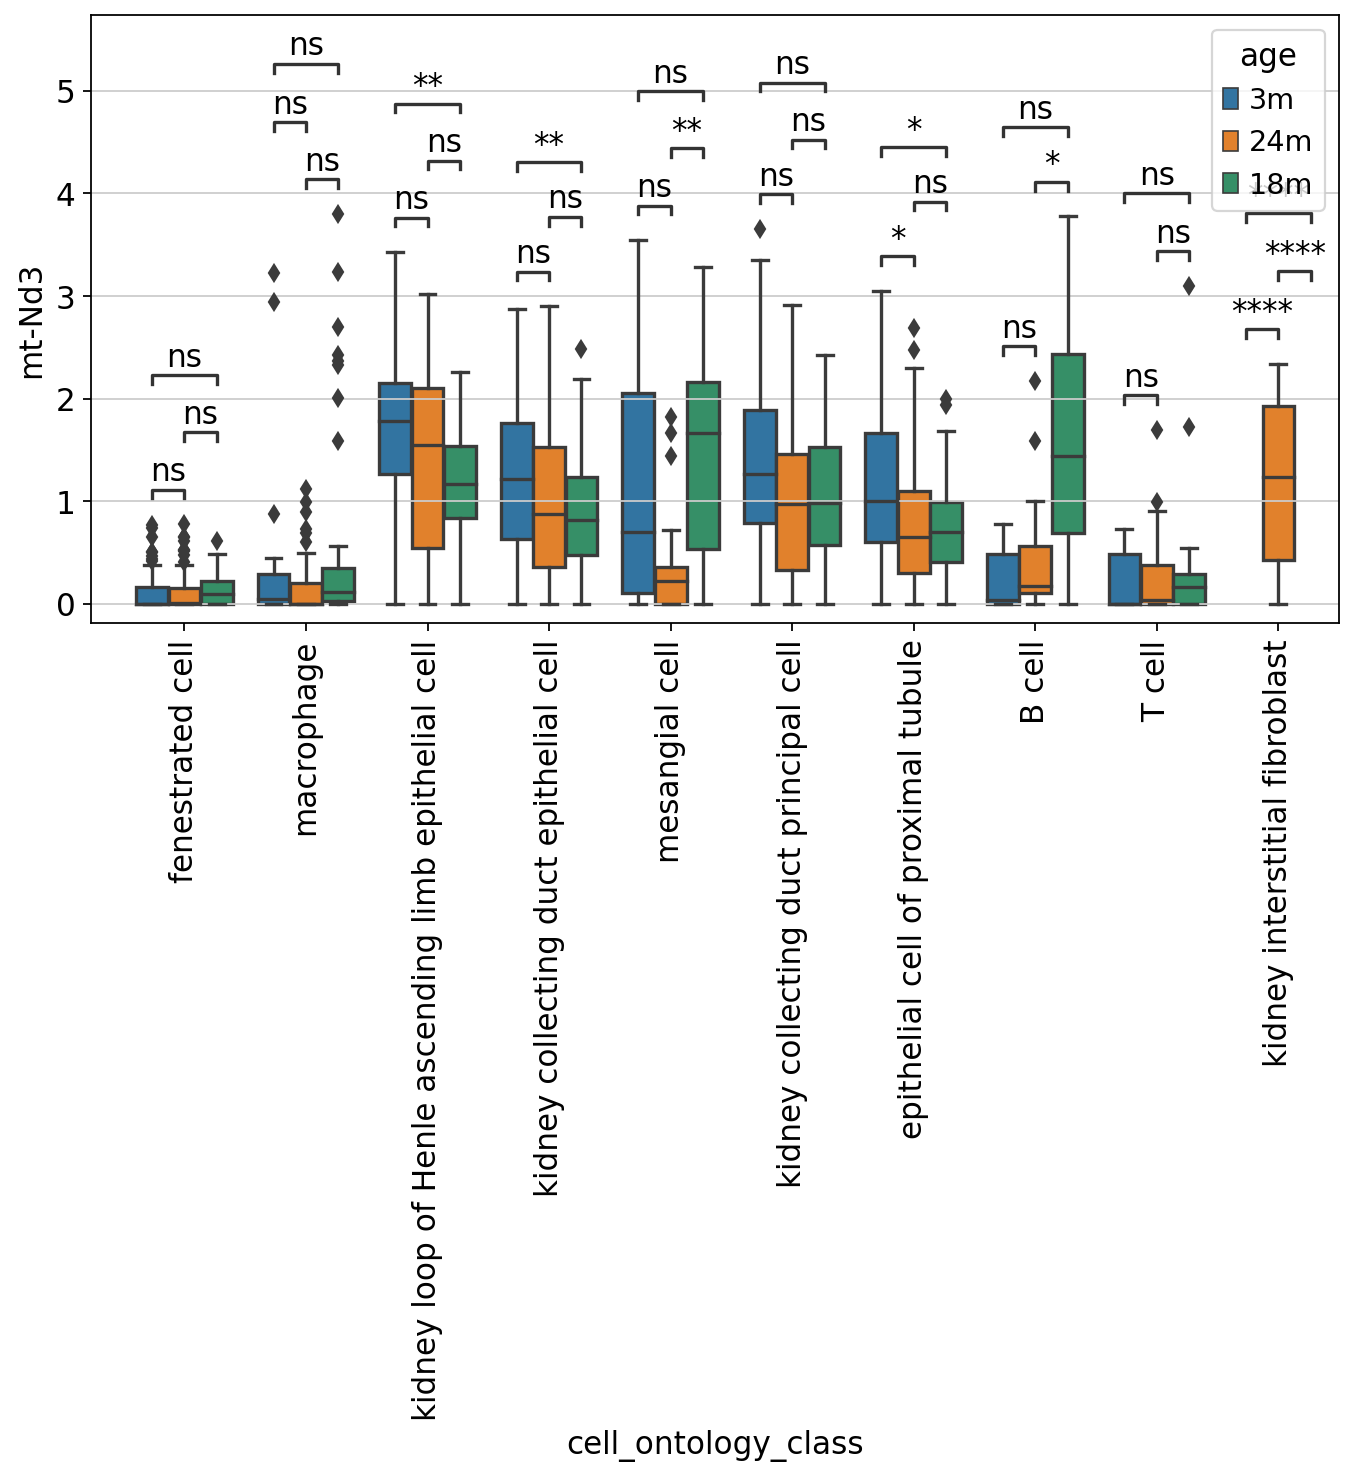

In [35]:
df = tissue3[['age','cell_ontology_class','mt-Nd3']]

x = "cell_ontology_class" 
y = "mt-Nd3" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd4

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.900e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.870e-01 U_stat=2.920e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.590e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.127e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.249e-03 U_stat=1.745e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.104e-02 U_stat=4.200e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.236e-01 U_stat=3.672e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.814e-01 U_stat=1.813e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.377e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test 

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Nd4'>,
  <statannot.StatResult.StatResult at 0x7fdad9f363d0>])

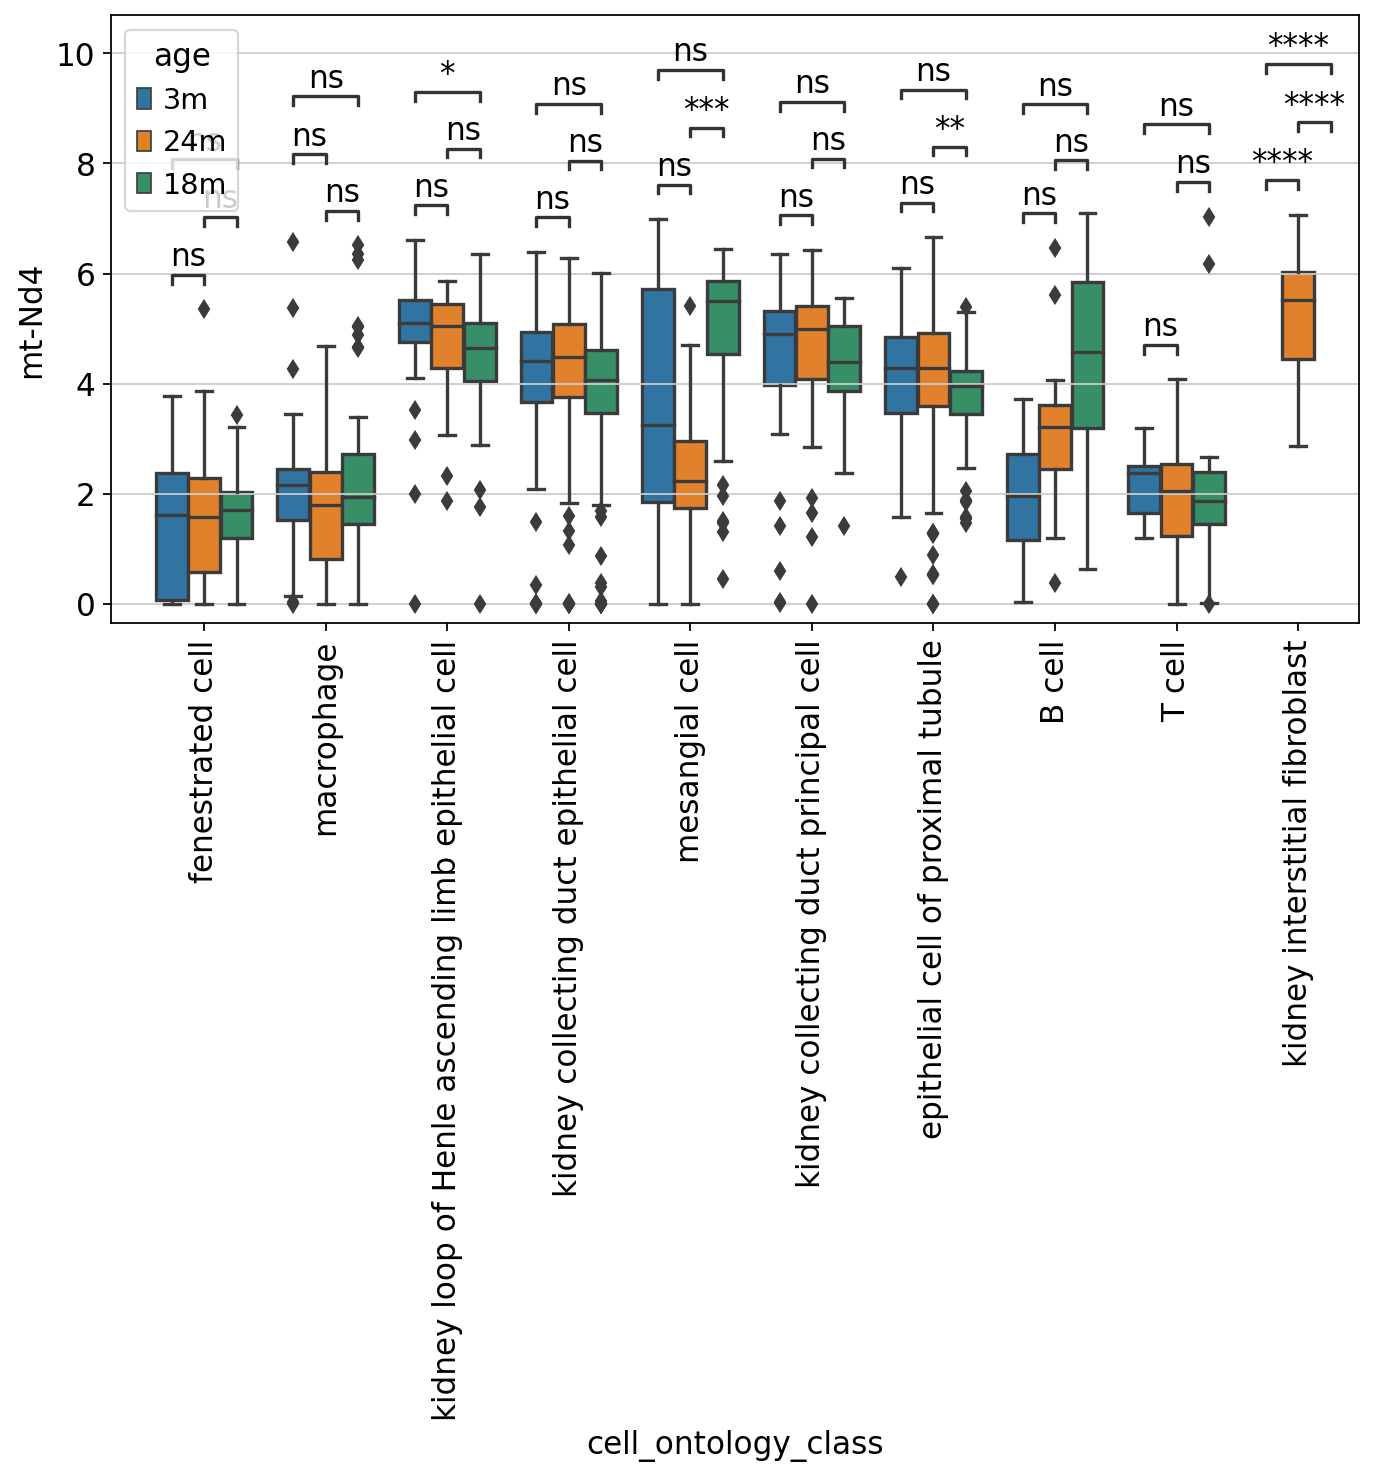

In [36]:
df = tissue3[['age','cell_ontology_class','mt-Nd4']]

x = "cell_ontology_class" 
y = "mt-Nd4" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd4l

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.600e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.970e+02


ValueError: All numbers are identical in mannwhitneyu

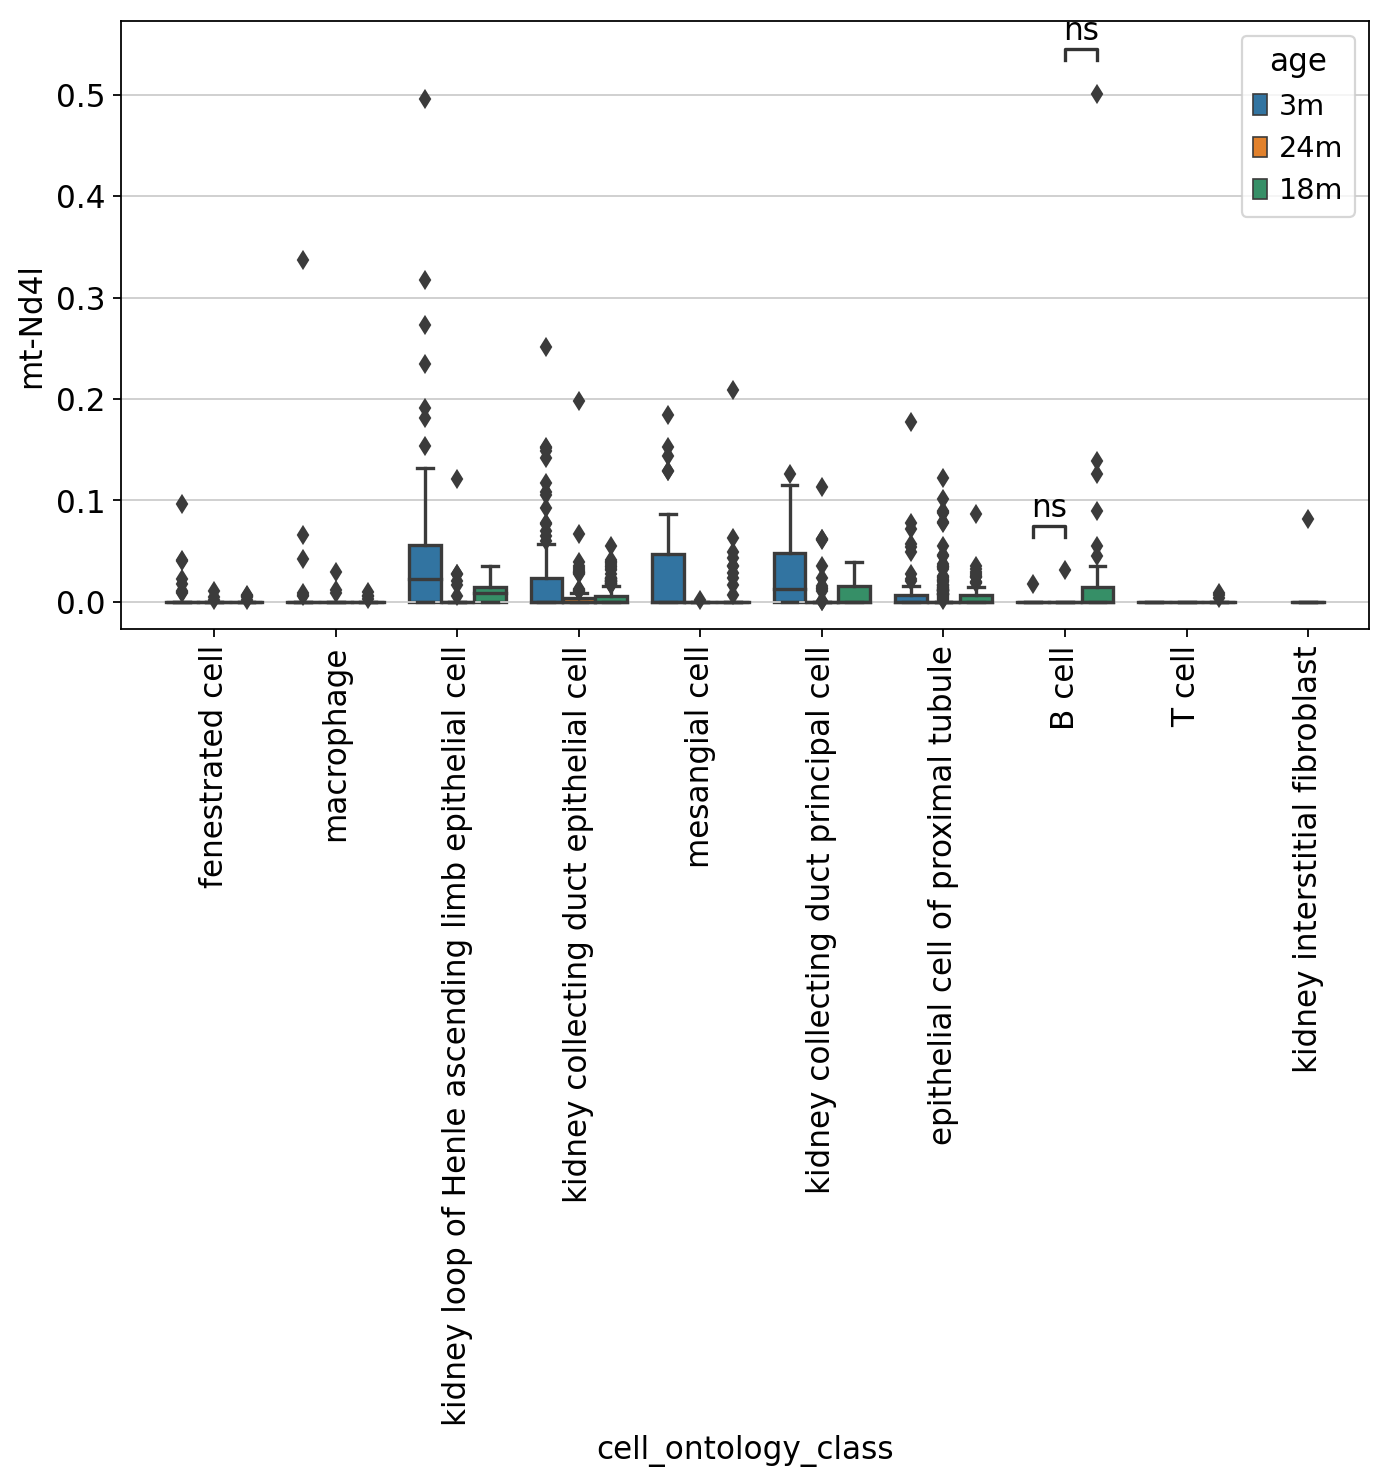

In [37]:
df = tissue3[['age','cell_ontology_class','mt-Nd4l']]

x = "cell_ontology_class" 
y = "mt-Nd4l" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### mt-Nd5 | B (3v24, 18v24), M (3v18)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.700e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.080e-03 U_stat=2.110e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.580e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.830e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.400e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.881e-02 U_stat=3.900e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.395e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.606e-03 U_stat=1.912e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.433e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test 

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Nd5'>,
  <statannot.StatResult.StatResult at 0x7fdad9975b20>])

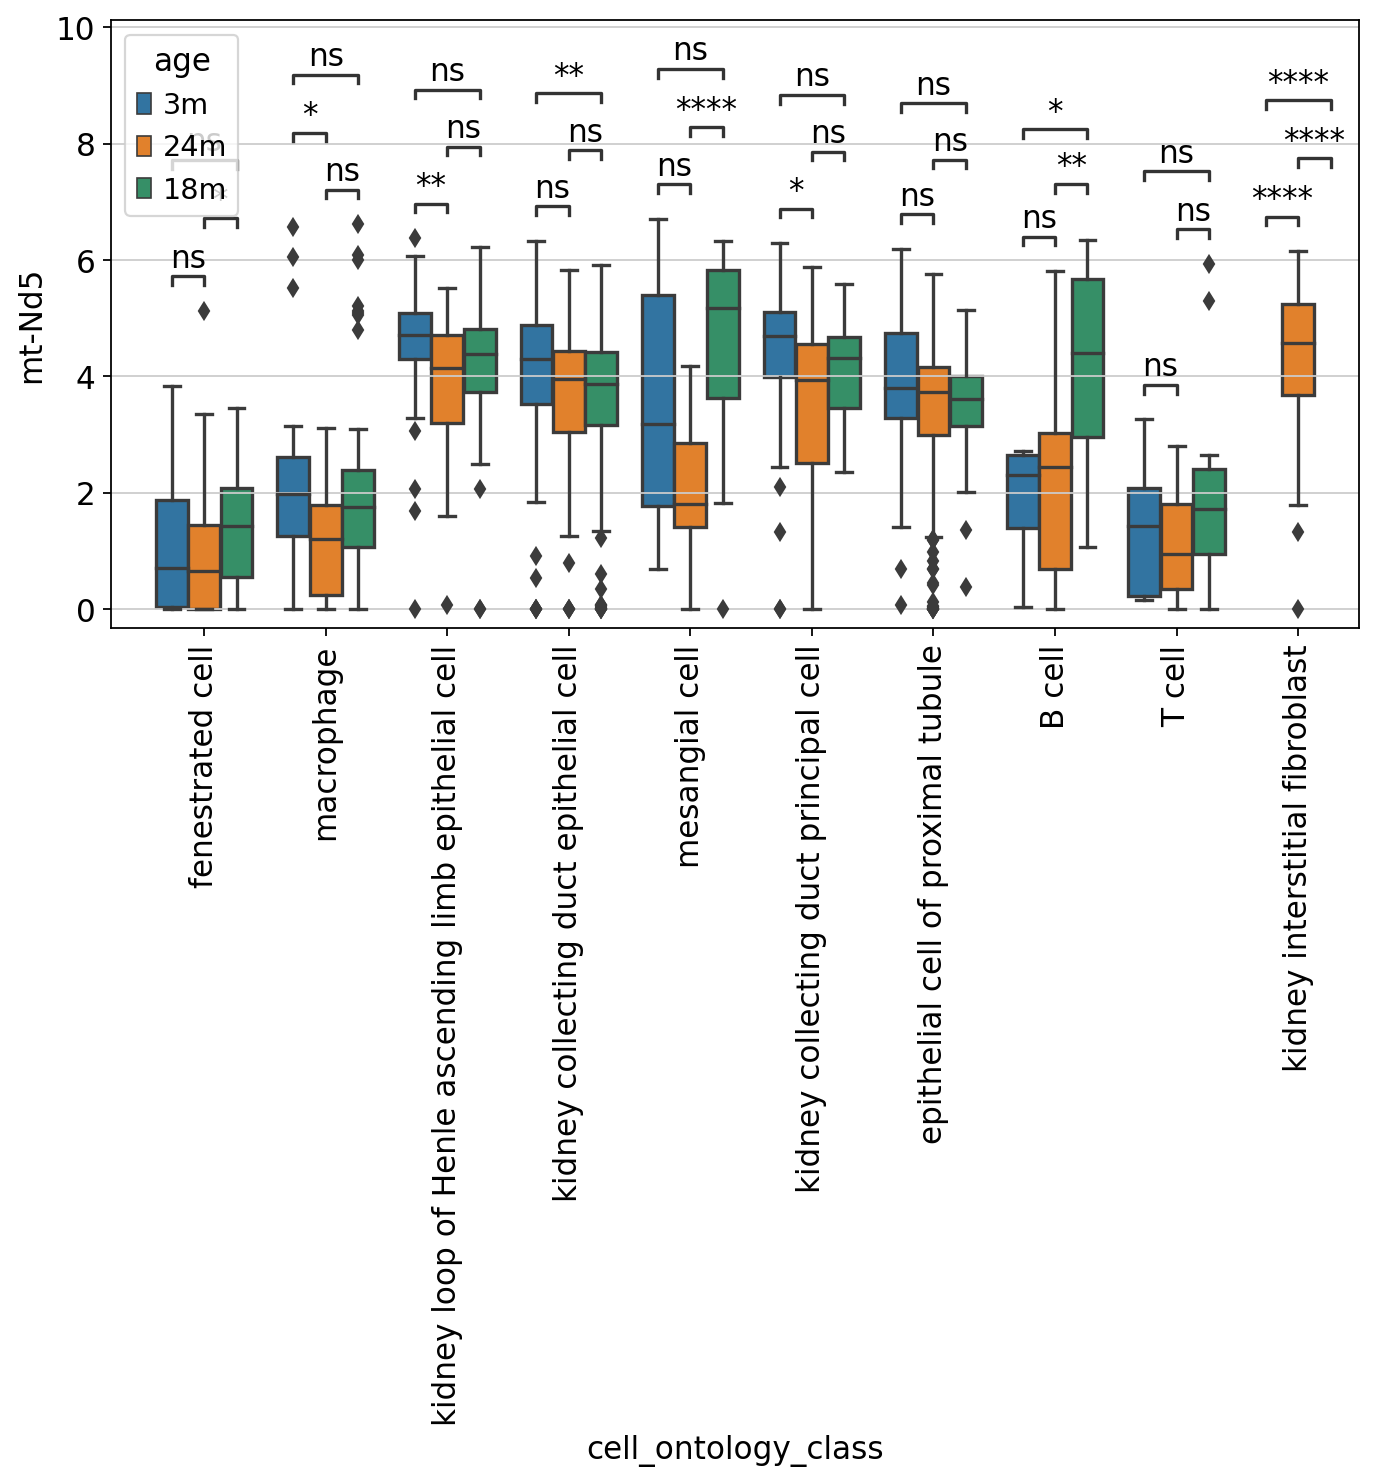

In [38]:
df = tissue3[['age','cell_ontology_class','mt-Nd5']]

x = "cell_ontology_class" 
y = "mt-Nd5" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)


#### mt-Nd6 | B (18v24), M (3v18)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.000e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.314e-02 U_stat=2.275e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.844e-01 U_stat=3.260e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.370e-05 U_stat=7.252e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.494e-02 U_stat=1.090e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_3m v.s. kidney interstitial fibroblast_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.040e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.072e-02 U_stat=3.766e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.550e-12 U_stat=2.286e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_va

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Nd6'>,
  <statannot.StatResult.StatResult at 0x7fdad9610460>])

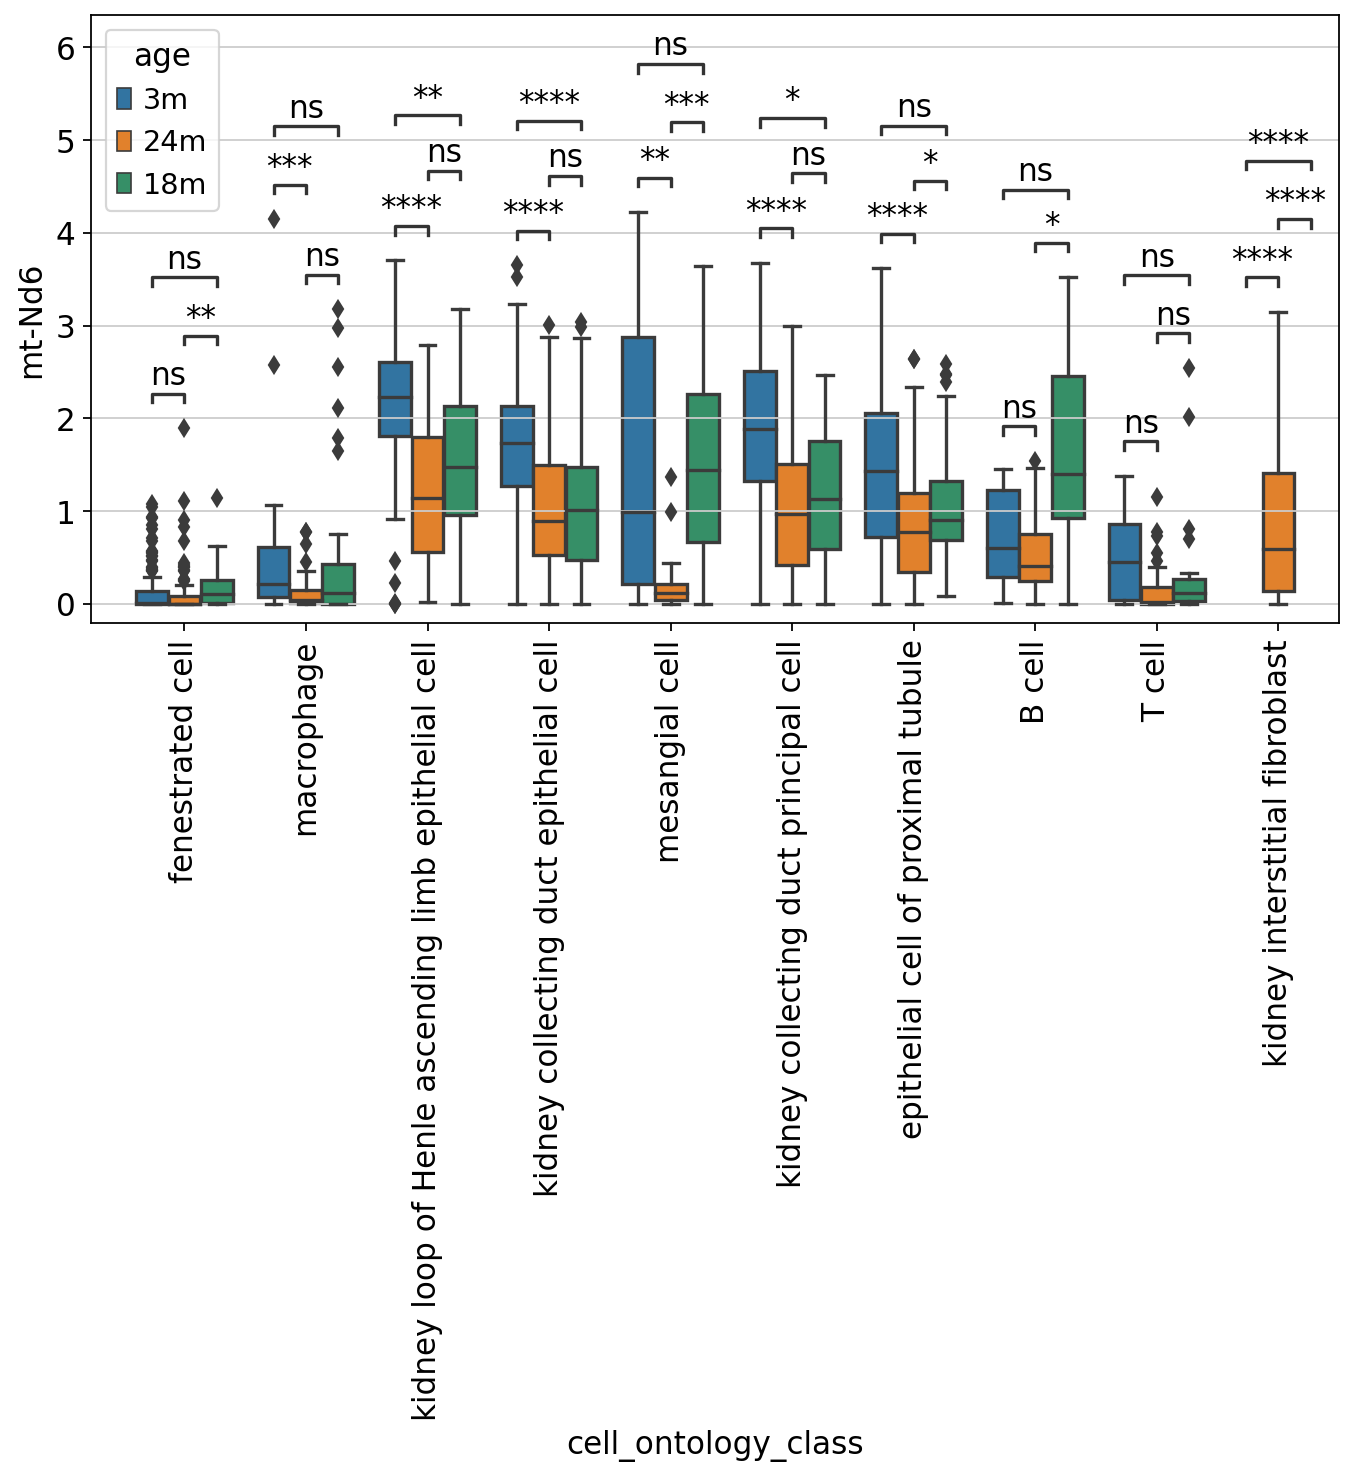

In [39]:
df = tissue3[['age','cell_ontology_class','mt-Nd6']]

x = "cell_ontology_class" 
y = "mt-Nd6" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)


#### mt-Rnr1 | B (18v24), M (18v24)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.900e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.832e-04 U_stat=1.520e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.720e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.760e-02 U_stat=6.662e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.319e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.581e-01 U_stat=3.705e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.191e-04 U_stat=2.012e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.426e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.526e-04 U_stat=1.830e+03
mesangial cell_3m v.s. mesangial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.220e+02
macrophage_3m v.s. macrophage_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Rnr1'>,
  <statannot.StatResult.StatResult at 0x7fdad932cb80>])

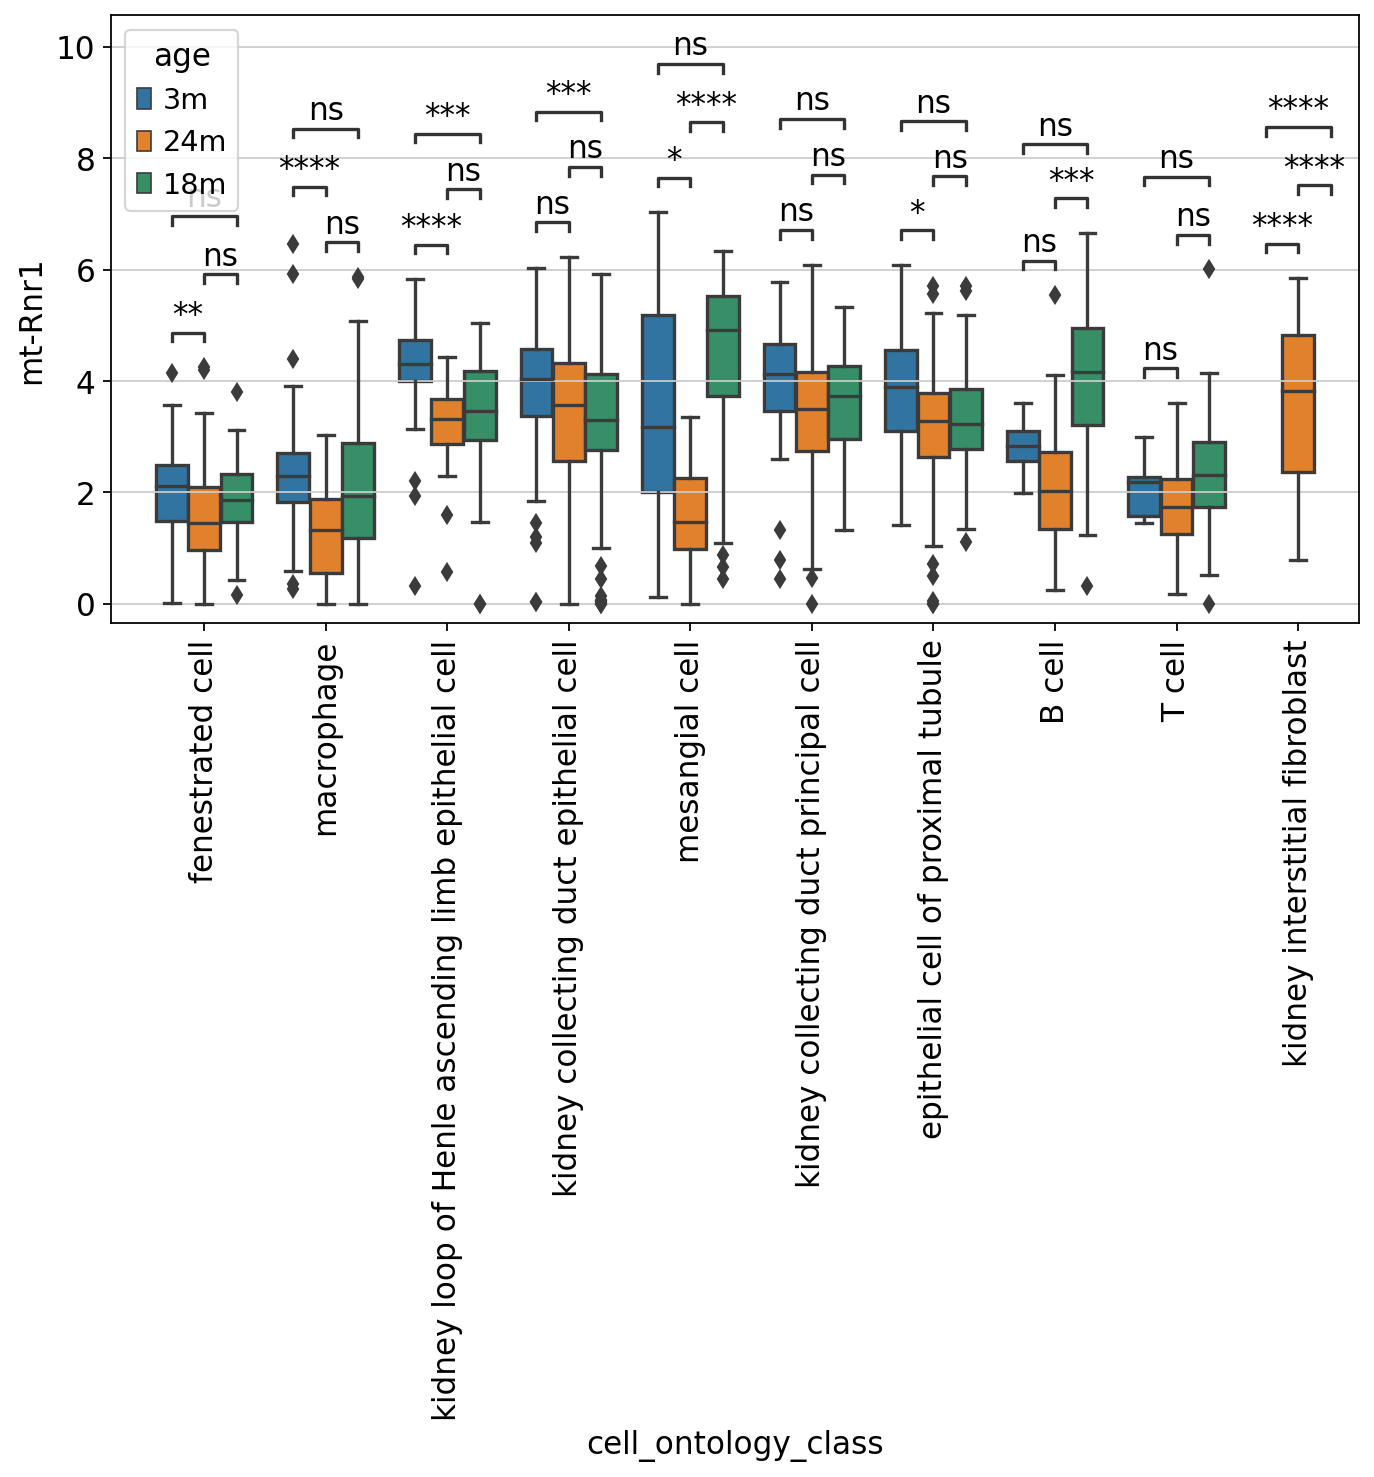

In [40]:
df = tissue3[['age','cell_ontology_class','mt-Rnr1']]

x = "cell_ontology_class" 
y = "mt-Rnr1" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)


#### mt-Rnr2

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

B cell_3m v.s. B cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.100e+01
B cell_24m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.604e-02 U_stat=2.610e+02
T cell_3m v.s. T cell_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.670e+02
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_24m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.128e+03
epithelial cell of proximal tubule_24m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.270e-04 U_stat=1.779e+04
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_24m: Mann-W

/mnt/ibm_sm/home/lea.mcgeever/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


kidney interstitial fibroblast_24m v.s. kidney interstitial fibroblast_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=0.000e+00
B cell_3m v.s. B cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.172e-02 U_stat=4.600e+01
epithelial cell of proximal tubule_3m v.s. epithelial cell of proximal tubule_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.581e-01 U_stat=3.658e+03
kidney collecting duct epithelial cell_3m v.s. kidney collecting duct epithelial cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.732e-01 U_stat=1.814e+04
kidney collecting duct principal cell_3m v.s. kidney collecting duct principal cell_18m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.433e+03
kidney loop of Henle ascending limb epithelial cell_3m v.s. kidney loop of Henle ascending limb epithelial cell_18m: Mann-Whitney-Wilcoxon test 

(<AxesSubplot:xlabel='cell_ontology_class', ylabel='mt-Rnr2'>,
  <statannot.StatResult.StatResult at 0x7fdad8ff7d00>])

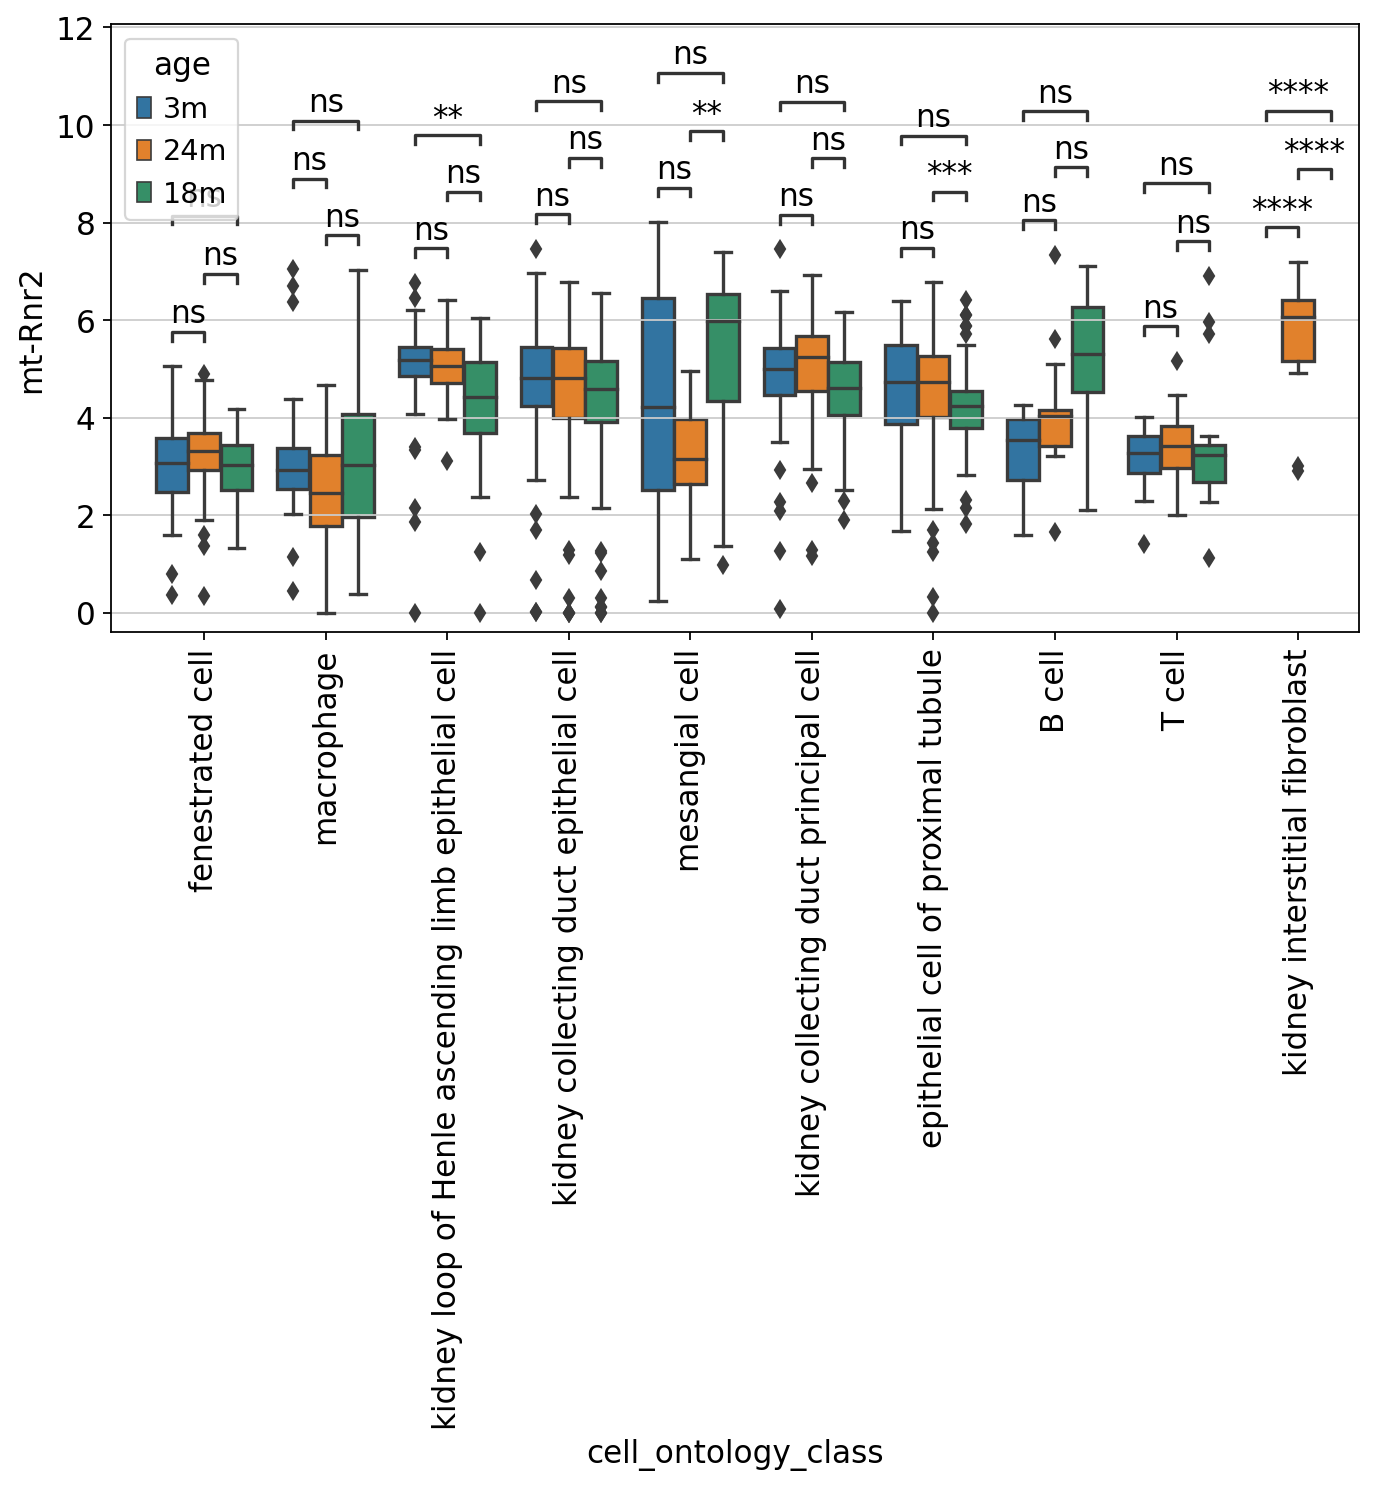

In [41]:
df = tissue3[['age','cell_ontology_class','mt-Rnr2']]

x = "cell_ontology_class" 
y = "mt-Rnr2" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)


### Genes and score_genes

#### histplot

In [ ]:
sns.histplot(, color='navy')
sns.histplot(, color='gold')


#### BCR

In [ ]:
df = tissueBCR[['age','cell_ontology_class','BCR']]

x = "cell_ontology_class" 
y = "BCR" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

In [ ]:
df = tissueBCR[['age','cell_ontology_class','Cd79a']]

x = "cell_ontology_class" 
y = "Cd79a" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")),  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Cd79a, | B, principal, maybe interesting

In [ ]:
df = tissueBCR[['age','cell_ontology_class','Cd79a']]

x = "cell_ontology_class" 
y = "Cd79a" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m"))  
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Cd79b, |B maybe interesting

In [ ]:
df = tissueBCR[['age','cell_ontology_class','Cd79b']]

x = "cell_ontology_class" 
y = "Cd79b" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

#### Cd38, hmmm?

Cd38 has a zero inflated distribution so I don't think this test works. However it is interesting to see CD38 expression in annotated endothelial cells

In [ ]:
df = df_kid[['age','cell_ontology_class','Cd38']]

x = "cell_ontology_class" 
y = "Cd38" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)

### Jablonski, Cd38 confusion, overpowering?

In [ ]:
Jablonski_genes = ['Cd38','Myc','Fpr2','Egr2','Gpr18','Nos2','Il1b','Il6','Il12b','Ccr7','Inhba','Tnf','Arg1','Retnla','Fn1','Mrc1'
                  ]

In [ ]:
Jablonski_obs = gene_expression_obs(tissue,Jablonski_genes)
Jablonski_df = gene_expression_df(Jablonski_obs,Jablonski_genes)

In [ ]:
ja = Jablonski_df.loc[Jablonski_df['cell_ontology_class'] == 'fenestrated cell']
jja=ja[['age','Cd38']]

**overpowering?**

In [ ]:
#B cell, no signif.
jb = Jablonski_df.loc[Jablonski_df['cell_ontology_class'] == 'B cell']
jjb=jb[['age','Cd38']]

df = jjb
x = "age"
y = "Cd38"
order = ['3m', '18m', '24m']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("3m", "18m"), ("3m", "24m"), ("18m", "24m")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)

In [ ]:
#fenestrated cell, signif?

df = jja
x = "age"
y = "Cd38"
order = ['3m', '18m', '24m']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("3m", "18m"), ("3m", "24m"), ("18m", "24m")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)

In [ ]:
df = Jablonski_df[['age','cell_ontology_class','Cd38']]

x = "cell_ontology_class" 
y = "Cd38" 
hue = 'age'
hue_order = ['3m', '18m', '24m']

box_pairs=[
    (("B cell", "3m"), ("B cell", "18m")),
    (("B cell", "3m"), ("B cell", "24m")),
    (("B cell", "18m"), ("B cell", "24m")),
    
    (("T cell", "3m"), ("T cell", "18m")),
    (("T cell", "3m"), ("T cell", "24m")),
    (("T cell", "18m"), ("T cell", "24m")),
    
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "18m")),
    (("epithelial cell of proximal tubule", "3m"), ("epithelial cell of proximal tubule", "24m")),
    (("epithelial cell of proximal tubule", "18m"), ("epithelial cell of proximal tubule", "24m")),
    
    (("fenestrated cell", "3m"), ("fenestrated cell", "18m")),
    (("fenestrated cell", "3m"), ("fenestrated cell", "24m")),
    (("fenestrated cell", "18m"), ("fenestrated cell", "24m")),
    
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "18m")),
    (("kidney collecting duct epithelial cell", "3m"), ("kidney collecting duct epithelial cell", "24m")),
    (("kidney collecting duct epithelial cell", "18m"), ("kidney collecting duct epithelial cell", "24m")),
    
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "18m")),
    (("kidney collecting duct principal cell", "3m"), ("kidney collecting duct principal cell", "24m")),
    (("kidney collecting duct principal cell", "18m"), ("kidney collecting duct principal cell", "24m")),
    
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "18m")),
    (("kidney interstitial fibroblast", "3m"), ("kidney interstitial fibroblast", "24m")),
    (("kidney interstitial fibroblast", "18m"), ("kidney interstitial fibroblast", "24m")),
    
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "18m")),
    (("kidney loop of Henle ascending limb epithelial cell", "3m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    (("kidney loop of Henle ascending limb epithelial cell", "18m"), ("kidney loop of Henle ascending limb epithelial cell", "24m")),
    
    (("macrophage", "3m"), ("macrophage", "18m")),
    (("macrophage", "3m"), ("macrophage", "24m")),
    (("macrophage", "18m"), ("macrophage", "24m")),
       
    (("mesangial cell", "3m"), ("mesangial cell", "18m")),
    (("mesangial cell", "3m"), ("mesangial cell", "24m")),
    (("mesangial cell", "18m"), ("mesangial cell", "24m")) 
    ]
fig = plt.figure(figsize=(10, 5))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y,hue=hue,box_pairs=box_pairs,
                    test='Mann-Whitney',loc='inside',verbose=2)